<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            1. Introduction
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Introduction:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
    Auto insurance fraud represents a multi-billion dollar problem for the insurance industry, leading to significant financial losses and consequently higher premiums for honest policyholders. Traditional methods of fraud detection often rely on manual investigation, which can be slow, resource-intensive, and prone to human error. This project introduces a data-driven approach to proactively identify fraudulent claims by leveraging machine learning. By analyzing a dataset of historical insurance claims, we will perform in-depth exploratory data analysis, engineer relevant features, and build a suite of classification models. The goal is to develop a robust predictive framework that can accurately flag suspicious claims, enabling insurers to allocate investigative resources more effectively and mitigate financial losses.
</p>   
<hr>
<h3>
    <font color = purple >
        <span style='font-family:Georgia'>
            Business Understanding:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        <b>Business Context:</b><br>
The core business of an auto insurance company is to manage risk. When a fraudulent claim is paid out, it directly impacts the company's bottom line and distorts the risk pool, forcing the company to raise premiums for all customers to cover the losses. Manually reviewing every single claim is operationally infeasible. Investigators typically have a limited capacity and need to focus their efforts on claims with the highest probability of being fraudulent. Therefore, the business requires an intelligent system to sift through thousands of claims and highlight the most suspicious ones.
        <br>

<b>Problem Statement:</b><br>
The primary business problem is the inefficient and reactive process of detecting fraudulent insurance claims. Without a reliable system to flag suspicious activity, insurance companies either absorb the cost of fraud or spend excessive time and money investigating legitimate claims, which can harm customer relations. The challenge is to create an automated system that can accurately distinguish between fraudulent and legitimate claims based on historical data patterns.
    </span>
</p>

<hr>
<h3>   
      <font color = purple >
            <span style='font-family:Georgia'>
            Business Objective:
            </span>   
        </font>    
</h3>
<p>
    <span style='font-family:Georgia'>
        The primary objective of this project is to build and evaluate a machine learning model that accurately classifies auto insurance claims as either fraudulent or legitimate.
<br>
To achieve this, the following specific objectives are defined:
    </span>
    <ol>
    <span style='font-family:Georgia'>
        <li><b>Develop a Predictive Model:</b> Implement and compare multiple classification algorithms (including Logistic Regression, Random Forest, and XGBoost) to identify the most effective model for this task.</li>
        <li><b>Optimize for High Recall:</b> The model must be optimized to minimize false negatives (i.e., fraudulent claims that are missed). The key business goal is to catch as many fraudulent claims as possible, so Recall will be a primary success metric.</li>
        <li><b>Maintain Reasonable Precision:</b> While maximizing recall, the model should also maintain a high level of Precision to ensure that the number of legitimate claims flagged for investigation (false positives) is kept to a manageable level, thus saving investigators' time.</li>
    </span>
</ol>
</p>

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            2. Imports and Reading data
            </span>   
        </font>    
</h2>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_excel("US Insurance Claims Data.xlsx")

In [ ]:
df.head()

months_as_customer   age  policy_number        policy_bind_date  \
0               154.0  34.0       795697.0 2022-03-30 19:28:31.971   
1               172.0  36.0       792268.0 2001-04-27 22:40:12.961   
2               353.0  47.0       568504.0 2011-12-25 09:00:46.445   
3                47.0  37.0       971810.0 2021-12-17 10:10:11.341   
4               301.0  50.0       898345.0 2001-01-25 21:42:10.693   

  policy_state policy_csl  policy_deductable  policy_annual_premium  \
0           IL   500/1000              998.0             856.999452   
1           OH    250/500              987.0            1282.389619   
2           IN    250/500             1976.0            1145.490048   
3           IN    250/500             1999.0            1255.267879   
4           IL    100/300             1995.0            1376.096761   

   umbrella_limit  insured_zip  ... police_report_available  \
0       3998347.0     419228.0  ...                       ?   
1             0.0     420170.0  ...                      NO   
2             0.0     421251.0  ...                       ?   
3             0.0     421620.0  ...                      NO   
4             0.0     421961.0  ...                       ?   

  total_claim_amount injury_claim property_claim vehicle_claim   auto_make  \
0            67253.0      11362.0        11390.0       46297.0        Ford   
1            52481.0       9427.0         9428.0       33509.0      Accura   
2            62665.0       5441.0        11077.0       44771.0       Dodge   
3             6614.0        670.0          667.0        5423.0        Jeep   
4            66431.0      12218.0         6086.0       48589.0  Volkswagen   

   auto_model auto_year fraud_reported _c39  
0        F150    1997.0              N  NaN  
1         MDX    1980.0              N  NaN  
2         RAM    2010.0              N  NaN  
3    Wrangler    1983.0              N  NaN  
4       Jetta    2036.0              N  NaN  

[5 rows x 40 columns]

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            3. Data Cleaning
            </span>   
        </font>    
</h2>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           9000 non-null   float64       
 1   age                          9000 non-null   float64       
 2   policy_number                9000 non-null   float64       
 3   policy_bind_date             9000 non-null   datetime64[ns]
 4   policy_state                 9000 non-null   object        
 5   policy_csl                   9000 non-null   object        
 6   policy_deductable            9000 non-null   float64       
 7   policy_annual_premium        9000 non-null   float64       
 8   umbrella_limit               9000 non-null   float64       
 9   insured_zip                  9000 non-null   float64       
 10  insured_sex                  9000 non-null   object        
 11  insured_education_level      9000 non-null

In [ ]:
df=df.drop(['policy_number','insured_zip','incident_location','_c39'],axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           9000 non-null   float64       
 1   age                          9000 non-null   float64       
 2   policy_bind_date             9000 non-null   datetime64[ns]
 3   policy_state                 9000 non-null   object        
 4   policy_csl                   9000 non-null   object        
 5   policy_deductable            9000 non-null   float64       
 6   policy_annual_premium        9000 non-null   float64       
 7   umbrella_limit               9000 non-null   float64       
 8   insured_sex                  9000 non-null   object        
 9   insured_education_level      9000 non-null   object        
 10  insured_occupation           9000 non-null   object        
 11  insured_hobbies              9000 non-null

In [ ]:
df.isnull().sum()

months_as_customer             1000
age                            1000
policy_bind_date               1000
policy_state                   1000
policy_csl                     1000
policy_deductable              1000
policy_annual_premium          1000
umbrella_limit                 1000
insured_sex                    1000
insured_education_level        1000
insured_occupation             1000
insured_hobbies                1000
insured_relationship           1000
capital-gains                  1000
capital-loss                   1000
incident_date                  1000
incident_type                  1000
collision_type                 1000
incident_severity              1000
authorities_contacted          1819
incident_state                 1000
incident_city                  1000
incident_hour_of_the_day       1000
number_of_vehicles_involved    1000
property_damage                1000
bodily_injuries                1000
witnesses                      1000
police_report_available        1000
total_claim_amount             1000
injury_claim                   1000
property_claim                 1000
vehicle_claim                  1000
auto_make                      1000
auto_model                     1000
auto_year                      1000
fraud_reported                 1000
dtype: int64

In [ ]:
df['authorities_contacted'].unique()

array(['Other', 'Fire', nan, 'Police', 'Ambulance'], dtype=object)

In [ ]:
df=df[df.isnull().mean(axis=1) < 0.9]

In [ ]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted           819
incident_state                    0
incident_city                     0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage                   0
bodily_injuries                   0
witnesses                         0
police_report_available           0
total_claim_amount                0
injury_claim                      0
property_claim                    0
vehicle_claim                     0
auto_make                         0
auto_model                        0
auto_year                         0
fraud_reported                 1000
dtype: int64

In [ ]:
df['fraud_reported'].unique()

array(['N', nan, 'Y'], dtype=object)

In [ ]:
df=df[~df['fraud_reported'].isnull()]

In [ ]:
df.shape

(8000, 36)

In [ ]:
df['authorities_contacted'] = df['authorities_contacted'].fillna('Unknown')

In [ ]:
df.isnull().sum()

months_as_customer             0
age                            0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_claim_amount             0
injury_claim                   0
property_claim                 0
vehicle_claim                  0
auto_make                      0
auto_model                     0
auto_year                      0
fraud_reported                 0
dtype: int64

In [ ]:
df.shape

(8000, 36)

In [ ]:
df['authorities_contacted'].unique()

array(['Other', 'Fire', 'Unknown', 'Police', 'Ambulance'], dtype=object)

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            4. Exploratory Data Analysis
            </span>   
        </font>    
</h2>

In [ ]:
df['fraud_reported'].value_counts()

fraud_reported
N    6024
Y    1976
Name: count, dtype: int64

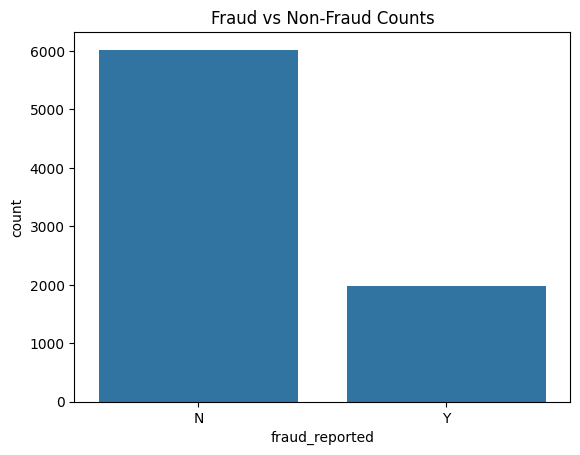

In [ ]:
sns.countplot(x='fraud_reported', data=df)
plt.title("Fraud vs Non-Fraud Counts")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>This bar chart provides a fundamental overview of the class distribution within your dataset, which is a critical first step in any classification problem.
    <li><b>What it Shows:</b> The graph displays the absolute counts of fraudulent ('Y') versus non-fraudulent ('N') claims. We can see that there are approximately 6,000 non-fraudulent claims and 2,000 fraudulent claims.</li>
    <li><b>Key Insight (Class Imbalance):</b>The most important takeaway from this graph is that the dataset is imbalanced. Non-fraudulent claims outnumber fraudulent claims by a ratio of roughly 3-to-1.
    </li>
    <li><b>Modeling Implication:</b> This imbalance is a crucial consideration for building your machine learning model. If left unaddressed, a standard model will likely become biased towards the majority class ('N') and perform poorly at identifying the minority class ('Y'), which is the class we are most interested in predicting. Therefore, techniques such as oversampling the minority class (e.g., SMOTE), undersampling the majority class, or using models that are inherently robust to class imbalance (like some tree-based methods) will be essential to build an effective fraud detection system. </li>
    </span>    
</div>

In [ ]:
print(df['fraud_reported'].value_counts(normalize=True))

fraud_reported
N    0.753
Y    0.247
Name: proportion, dtype: float64


Classes are imbalanced

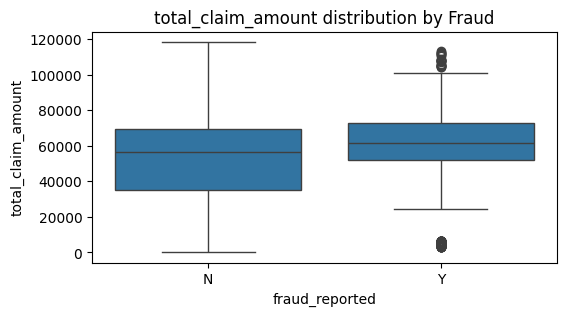

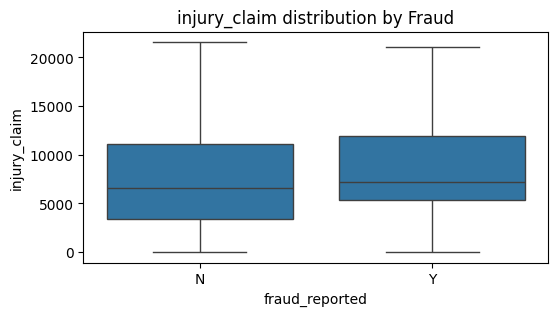

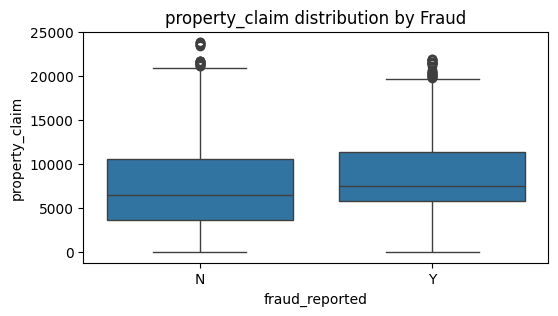

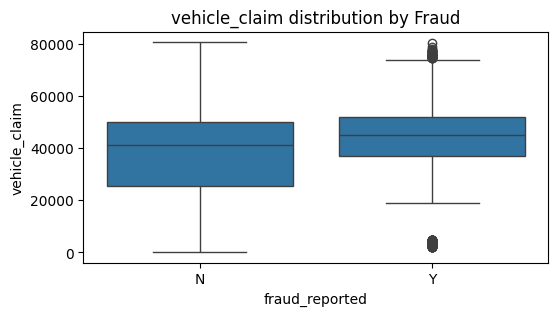

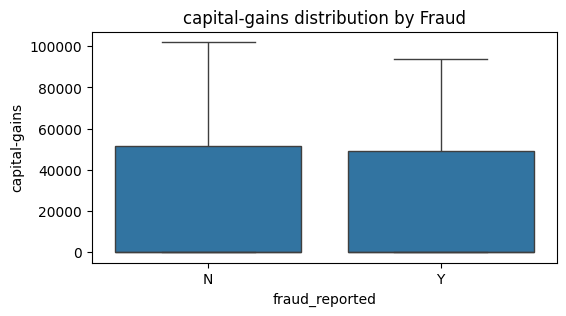

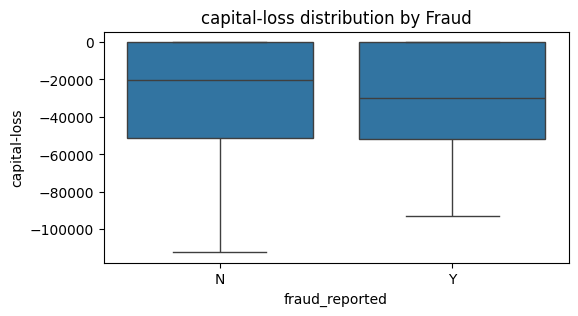

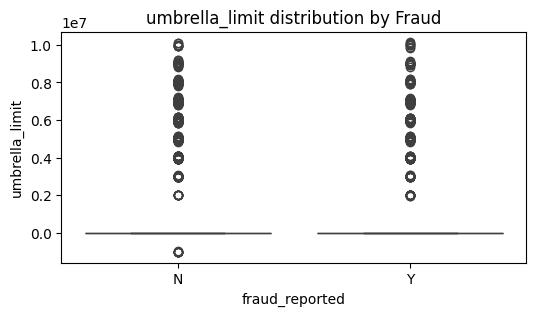

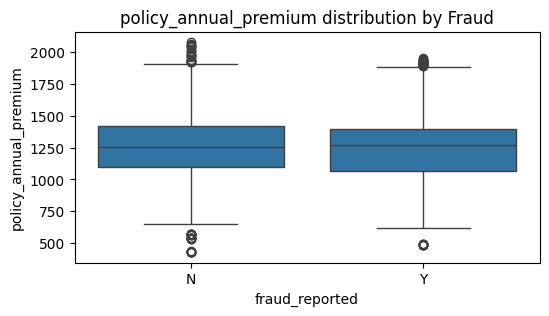

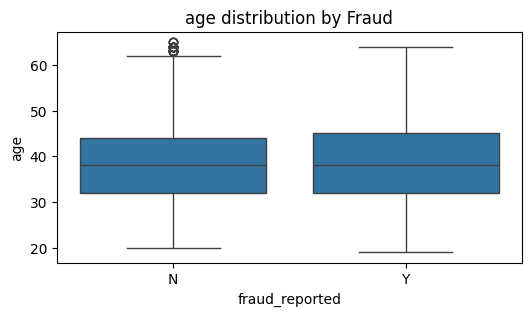

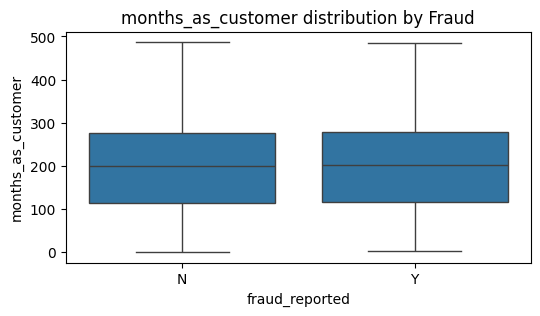

In [ ]:
num_cols = ['total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim',
            'capital-gains', 'capital-loss', 'umbrella_limit', 'policy_annual_premium',
            'age', 'months_as_customer']

for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.boxplot(x='fraud_reported', y=col, data=df)
    plt.title(f"{col} distribution by Fraud")
    plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
    <li><b>Total Claim Amount:</b> The median total claim amount for fraudulent claims is slightly higher than for non-fraudulent ones. However, the overall distributions are quite similar, suggesting this feature alone may not be a strong predictor.</li>
    <li><b>Injury Claim:</b>Fraudulent claims tend to have a noticeably higher median injury claim amount. This indicates that inflated injury costs could be a significant indicator of fraud.</li>
    <li><b>Property Claim:</b> Similar to injury claims, the median property claim amount is visibly higher for fraudulent cases. This suggests that property damage might also be commonly exaggerated in fraudulent reports.</li>
    <li><b>Vehicle Claim:</b> The median vehicle claim amount is almost identical for both fraudulent and non-fraudulent cases. This feature appears to have very little predictive power on its own.</li>
    <li><b>Capital Gains:</b> The distributions for capital gains are nearly identical between fraudulent and non-fraudulent claims. This feature is unlikely to be useful in detecting fraud.</li>
    <li><b>Capital Loss:</b> The distributions for capital loss are also very similar for both classes. This feature does not show a clear signal for differentiating between fraudulent and non-fraudulent claims.</li>
    <li><b>Umbrella Limit:</b> The vast majority of claims for both classes have an umbrella limit of zero, with some outliers. This feature shows no discernible difference between fraudulent and non-fraudulent claims.</li>
    <li><b>Policy Annual Premium:</b> The median annual premium for fraudulent claims is slightly lower than for non-fraudulent claims. This might suggest that fraudsters could be drawn to cheaper policies, but the difference is not substantial.</li>
    <li><b>Age:</b> The age distributions for both fraudulent and non-fraudulent policyholders are almost identical. This indicates that age is not a significant factor in predicting the likelihood of fraud.</li>
    <li><b>Months as Customer:</b> The distributions for how long a person has been a customer are nearly the same for both classes. This suggests that both new and long-term customers are equally likely to be involved in fraudulent claims.</li>
    </span>    
</div>

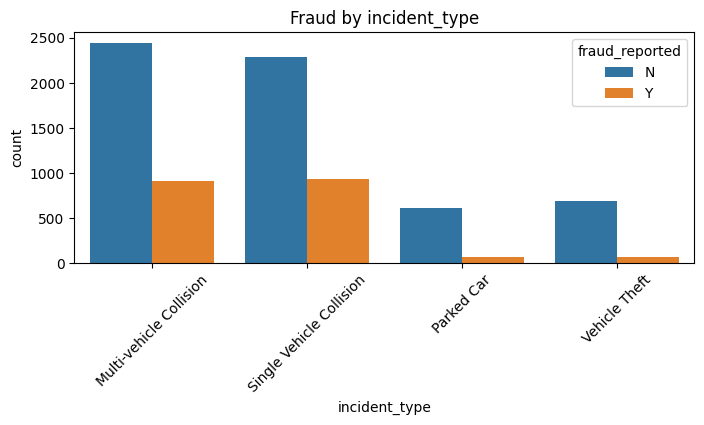

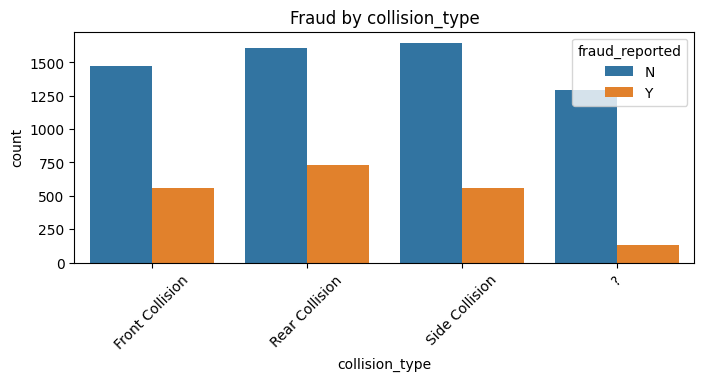

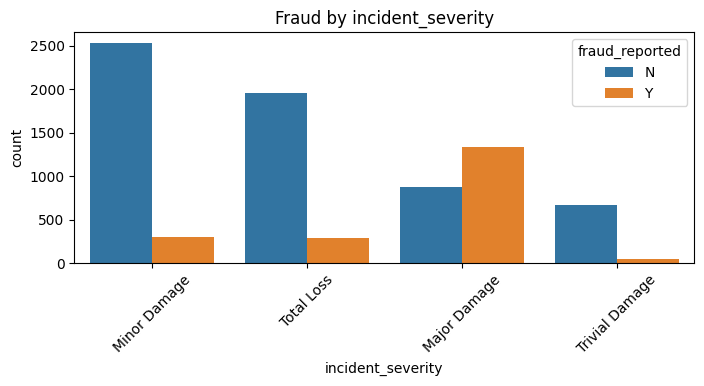

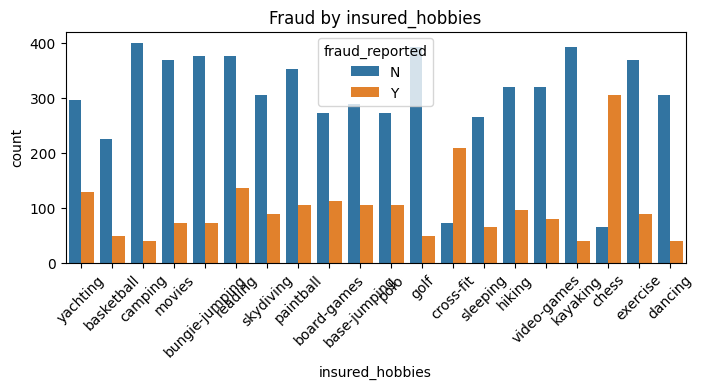

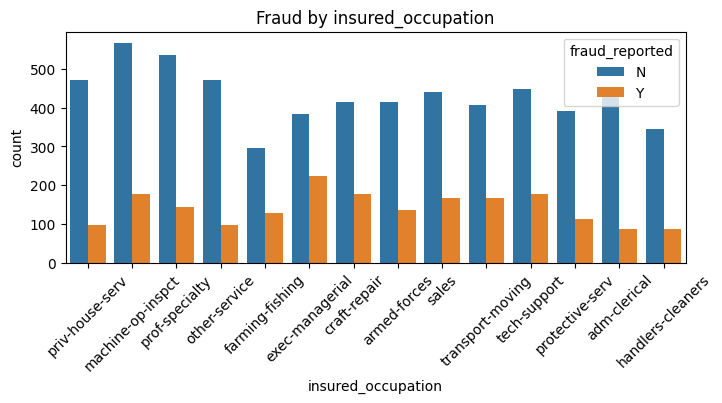

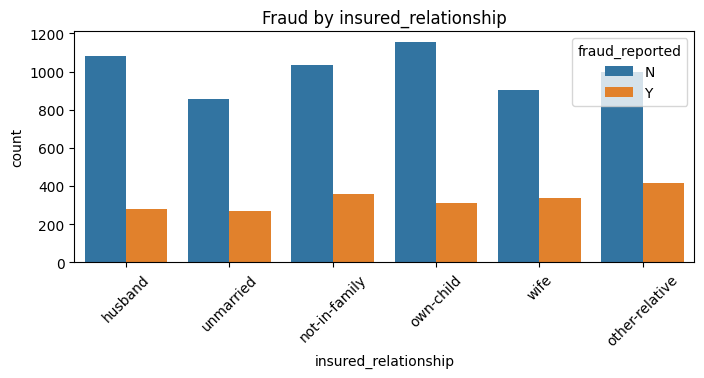

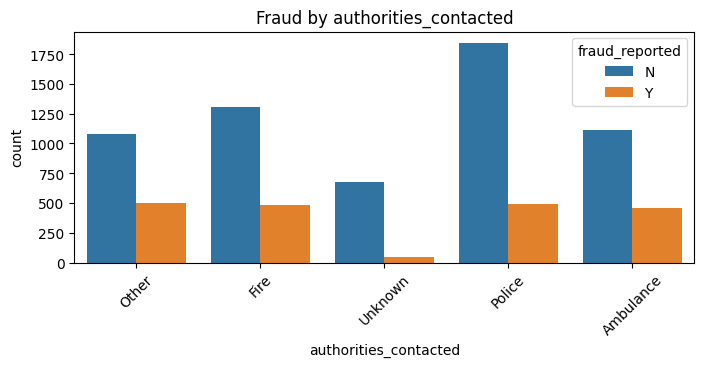

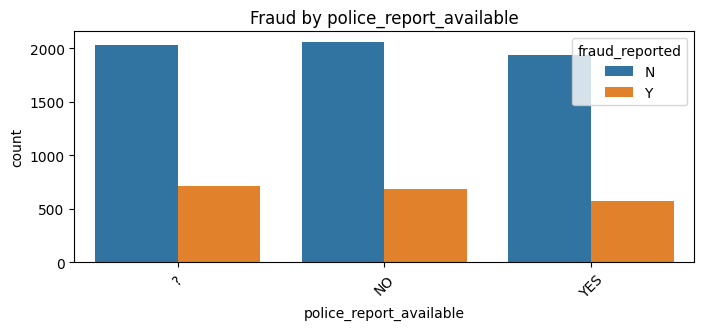

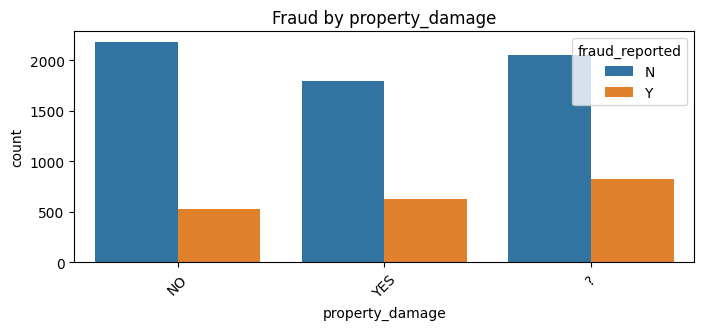

In [ ]:
cat_cols = ['incident_type', 'collision_type', 'incident_severity',
            'insured_hobbies', 'insured_occupation', 'insured_relationship',
            'authorities_contacted', 'police_report_available', 'property_damage']

for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(x=col, hue='fraud_reported', data=df)
    plt.title(f"Fraud by {col}")
    plt.xticks(rotation=45)
    plt.show()

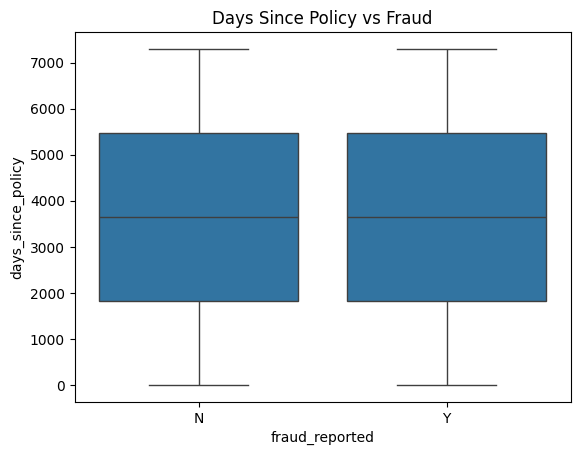

In [ ]:
df['days_since_policy'] = (df['incident_date'] - df['policy_bind_date']).dt.days

sns.boxplot(x='fraud_reported', y='days_since_policy', data=df)
plt.title("Days Since Policy vs Fraud")
plt.show()

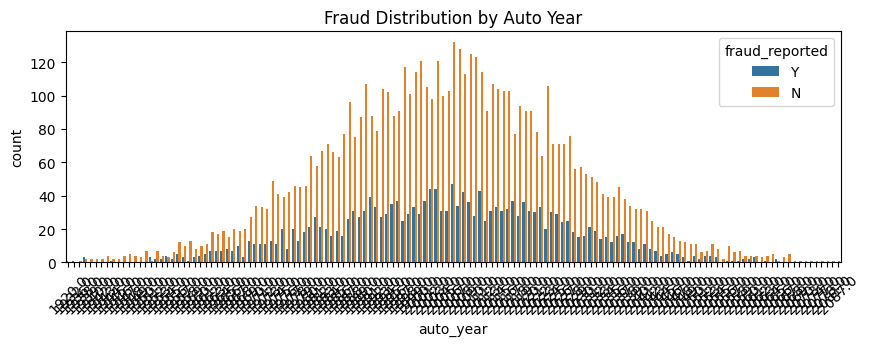

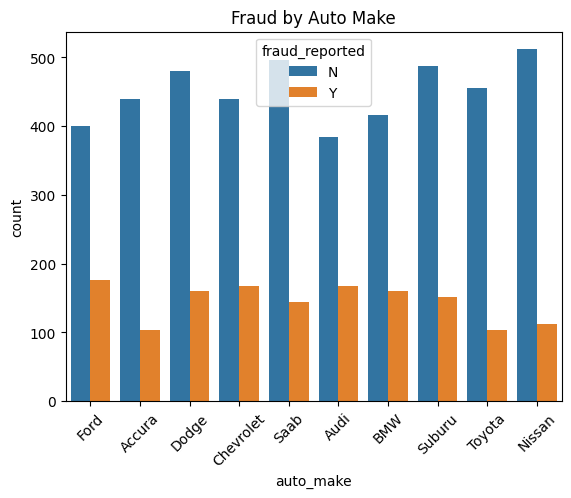

In [ ]:
plt.figure(figsize=(10, 3))
sns.countplot(x='auto_year', hue='fraud_reported', data=df)
plt.title("Fraud Distribution by Auto Year")
plt.xticks(rotation=45)
plt.show()

# Top 10 makes
top_makes = df['auto_make'].value_counts().nlargest(10).index
sns.countplot(data=df[df['auto_make'].isin(top_makes)], x='auto_make', hue='fraud_reported')
plt.title("Fraud by Auto Make")
plt.xticks(rotation=45)
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br>
    <li><b>Analysis of Fraud Distribution by Auto Year:</b> This graph shows the number of fraudulent ('Y') and non-fraudulent ('N') claims distributed across different vehicle manufacturing years. The key takeaway is that the ratio of fraudulent to non-fraudulent claims appears to be relatively consistent across all years. While there are more claims (both fraudulent and non-fraudulent) for cars manufactured in the mid-2000s, no specific year or range of years stands out as being disproportionately associated with fraud
</li>
    <li><b>Analysis of Fraud by Auto Make:</b> This chart compares the counts of fraudulent and non-fraudulent claims across various car makes. While some brands like Nissan and Dodge have a higher absolute number of claims, the proportion of fraudulent claims to non-fraudulent claims is visually similar for all makes shown. This suggests that the make of the vehicle is likely not a strong predictor of whether a claim is fraudulent.
 </li>
 
 
    </span>    
</div>

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'days_since_policy'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 0 to 8999
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   months_as_customer           8000 non-null   float64       
 1   age                          8000 non-null   float64       
 2   policy_bind_date             8000 non-null   datetime64[ns]
 3   policy_state                 8000 non-null   object        
 4   policy_csl                   8000 non-null   object        
 5   policy_deductable            8000 non-null   float64       
 6   policy_annual_premium        8000 non-null   float64       
 7   umbrella_limit               8000 non-null   float64       
 8   insured_sex                  8000 non-null   object        
 9   insured_education_level      8000 non-null   object        
 10  insured_occupation           8000 non-null   object        
 11  insured_hobbies              8000 non-null   obj

In [ ]:
df1=df.drop('total_claim_amount',axis=1)

In [ ]:
df['sum_claims']=df['injury_claim']+df['property_claim']+df['vehicle_claim']

In [ ]:
df['sum_claims']

0       69049.0
1       52364.0
2       61289.0
3        6760.0
4       66893.0
         ...   
8994    70437.0
8995    65896.0
8996    85895.0
8997    67770.0
8999    44712.0
Name: sum_claims, Length: 8000, dtype: float64

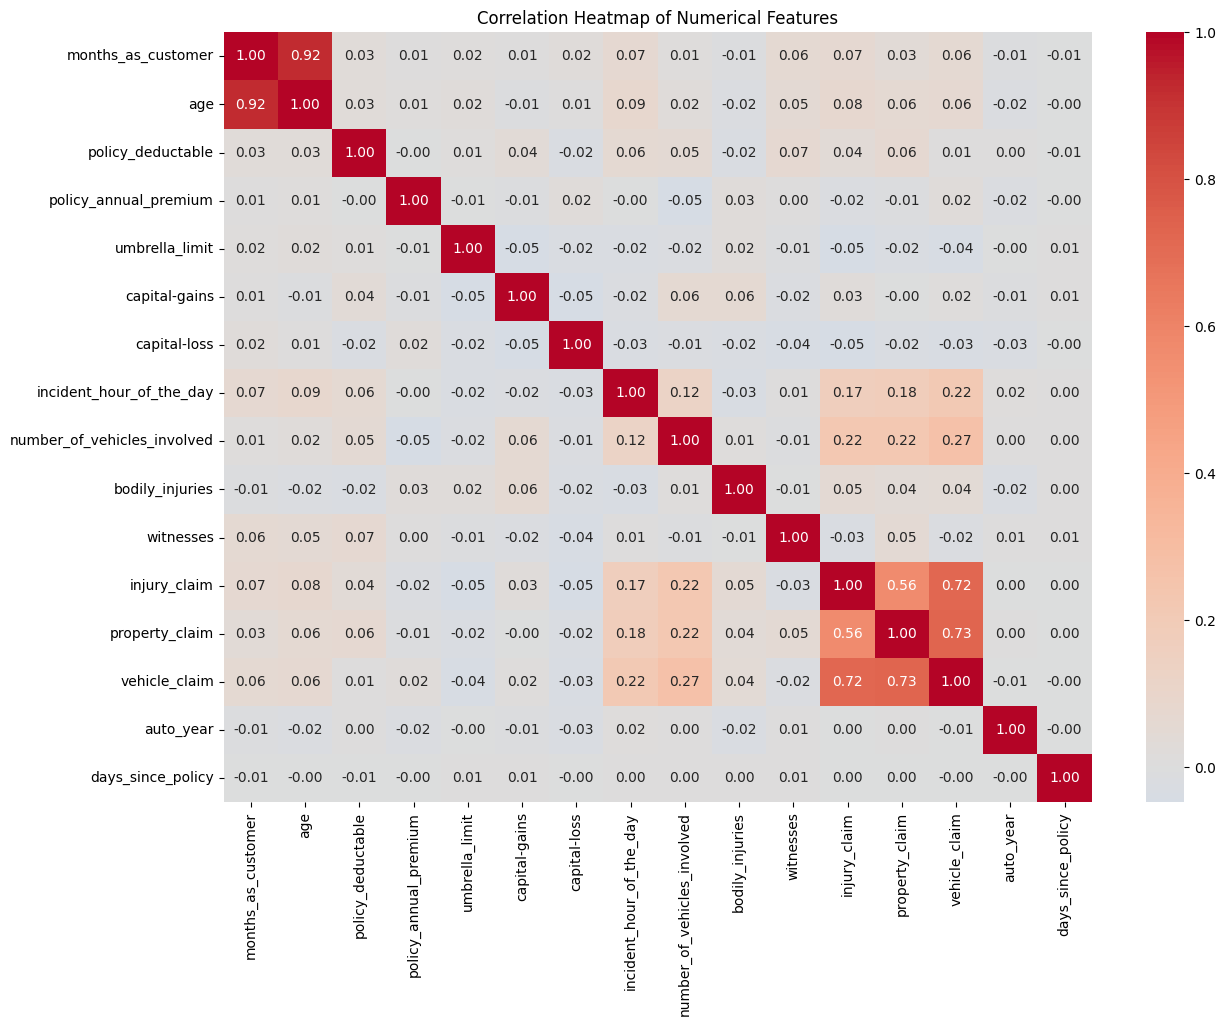

In [ ]:
plt.figure(figsize=(14, 10))
corr = df1.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

<div class="alert alert-block alert-info">
    <span style='font-family:Georgia'>
        <b>Insight: </b><br> This heatmap visualizes the Pearson correlation coefficient between all the numerical features in the dataset. The color scale ranges from cool colors (light grey/blue) for negative or no correlation to warm colors (red) for strong positive correlation.<br>
The most critical insight from this graph is the presence of high multicollinearity among the claim amount features.
    
    <li>There is a very strong positive correlation between total_claim_amount and its constituent parts: injury_claim, property_claim, and vehicle_claim. The correlation coefficients are 0.80, 0.81, and 0.72, respectively.
</li>

    <li>This is expected, as the total claim is simply the sum of the individual claim types. For a machine learning model, including all of these features would be redundant and could negatively impact the model's performance and interpretability.</li>
    <li>Similarly, months_as_customer and age have a very high correlation of 0.92, which is also logical as older people have likely been customers for longer. </li>
    <li>There is a moderate positive correlation between number_of_vehicles_involved and total_claim_amount (0.27). This makes sense, as incidents involving more vehicles are likely to result in higher total damages. </li>
    <li>The vast majority of other feature pairs show very weak correlations (values close to 0.0). For example, policy_annual_premium has almost no linear relationship with the claim amounts or the age of the customer.
 </li>
 
 
    </span>    
</div>

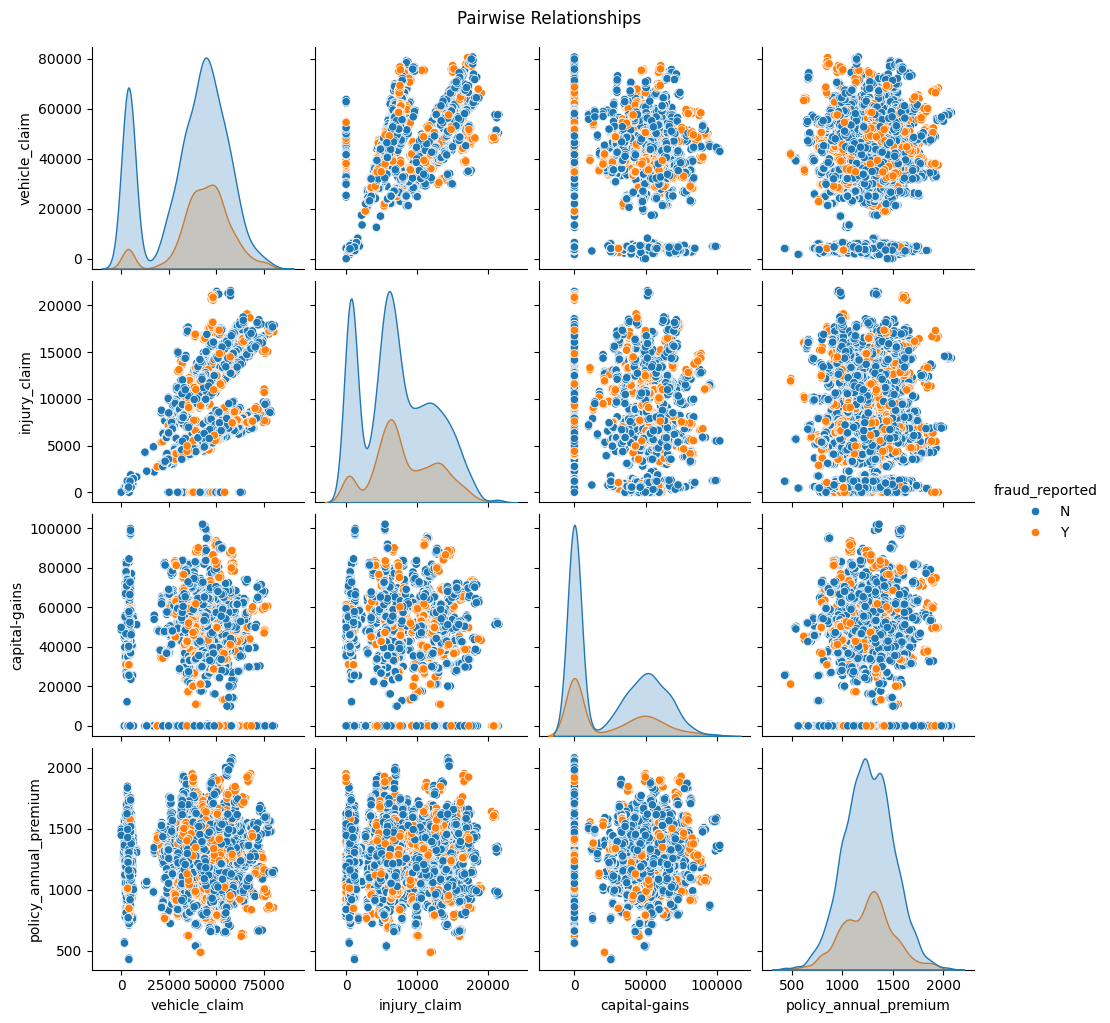

In [ ]:
selected = ['vehicle_claim', 'injury_claim', 'capital-gains', 'policy_annual_premium']
sns.pairplot(df1[selected + ['fraud_reported']], hue='fraud_reported', diag_kind='kde', height=2.5)
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()

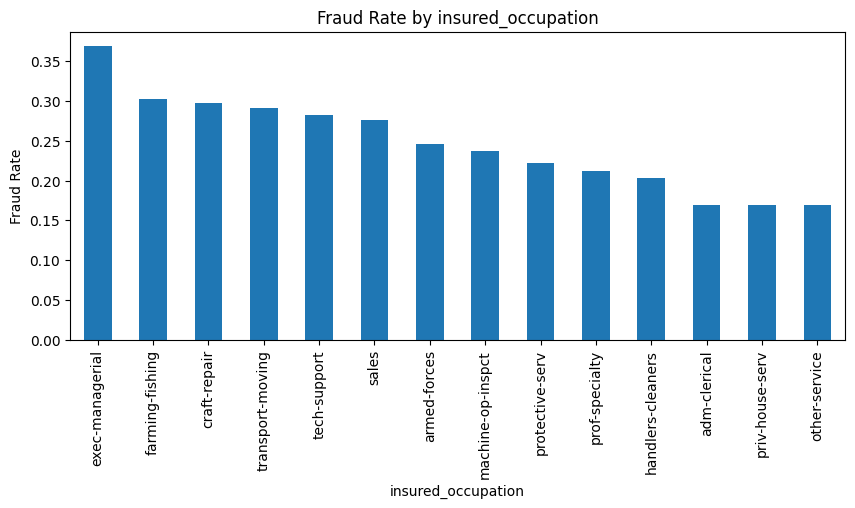

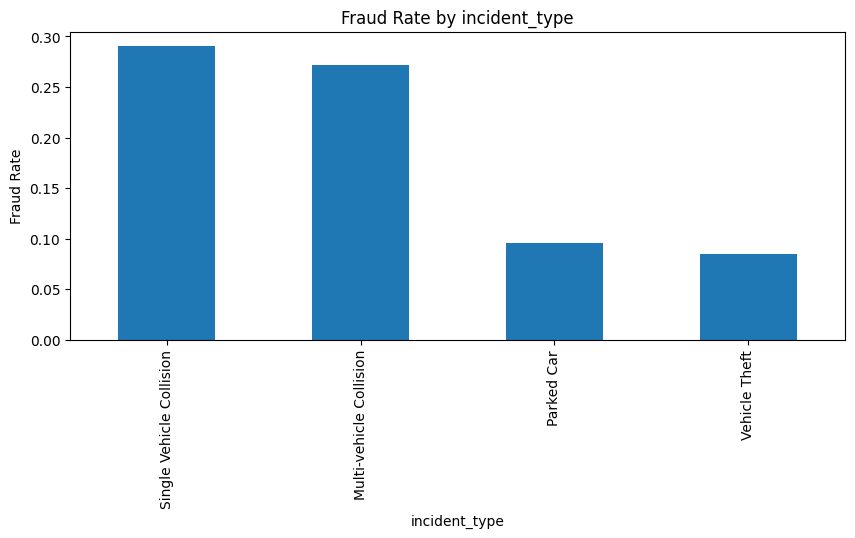

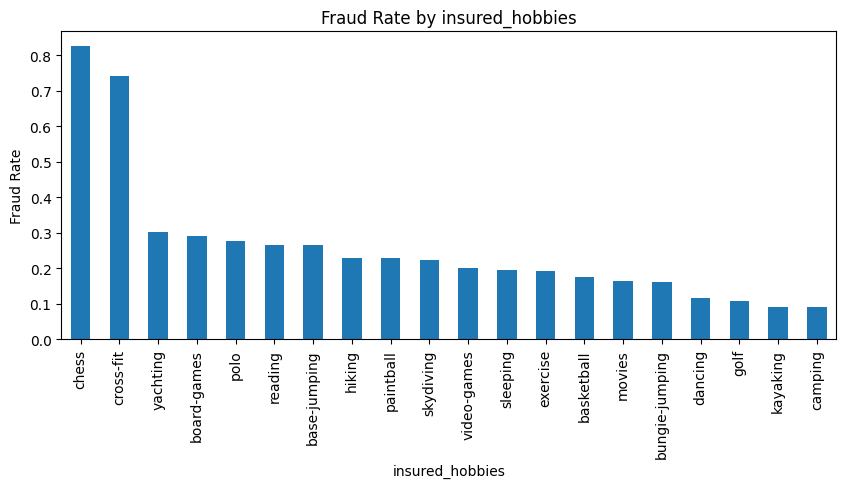

In [ ]:
def fraud_rate_plot(col):
    temp = df.groupby(col)['fraud_reported'].value_counts(normalize=True).unstack().fillna(0)['Y']
    temp.sort_values(ascending=False).plot(kind='bar', figsize=(10,4), title=f"Fraud Rate by {col}")
    plt.ylabel("Fraud Rate")
    plt.show()

fraud_rate_plot('insured_occupation')
fraud_rate_plot('incident_type')
fraud_rate_plot('insured_hobbies')

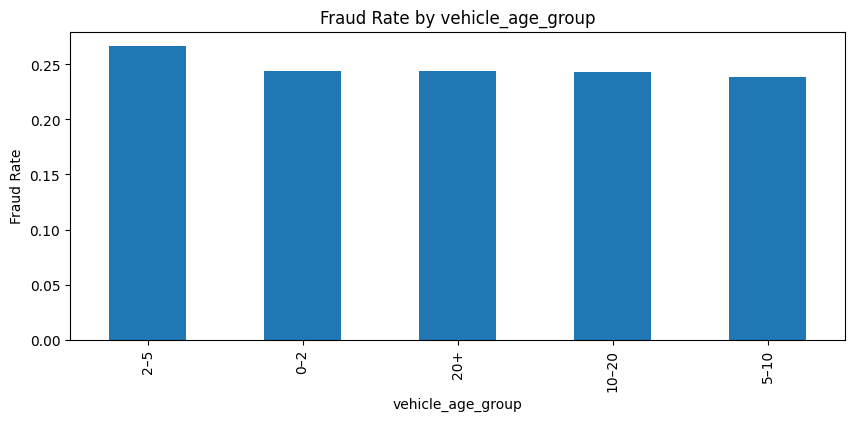

In [ ]:
df['vehicle_age_at_incident'] = df['incident_date'].dt.year - df['auto_year']
df['vehicle_age_group'] = pd.cut(df['vehicle_age_at_incident'], bins=[0, 2, 5, 10, 20, 50],
                                 labels=['0–2', '2–5', '5–10', '10–20', '20+'])

fraud_rate_plot('vehicle_age_group')

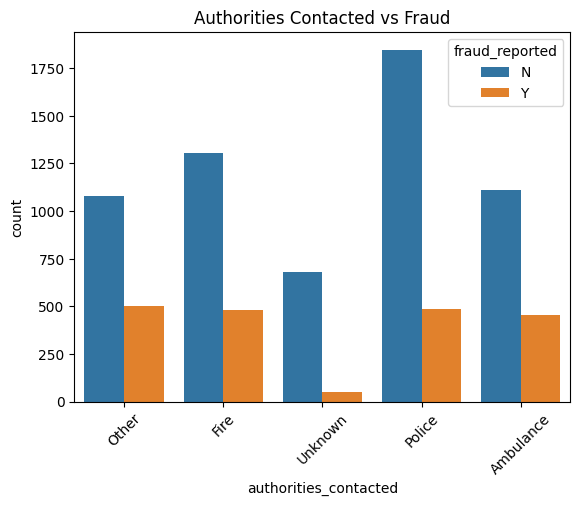

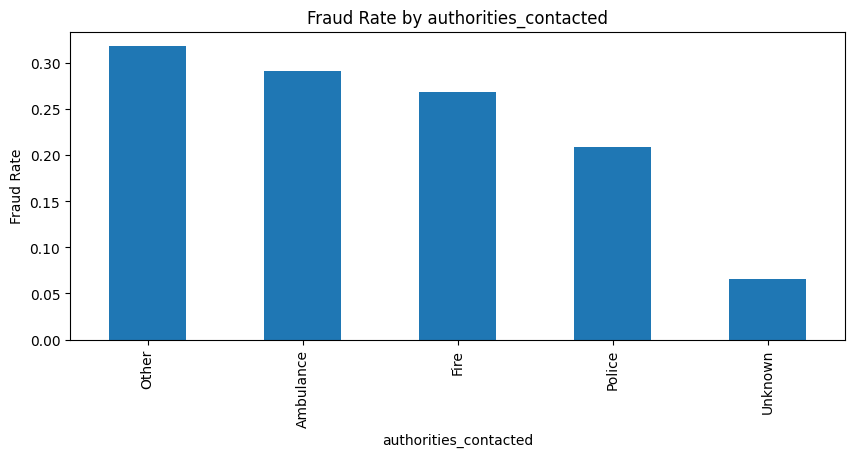

In [ ]:
sns.countplot(data=df, x='authorities_contacted', hue='fraud_reported')
plt.title("Authorities Contacted vs Fraud")
plt.xticks(rotation=45)
plt.show()

fraud_rate_plot('authorities_contacted')

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'days_since_policy',
       'sum_claims', 'vehicle_age_at_incident', 'vehicle_age_group'],
      dtype='object')

In [ ]:
df=df.drop('vehicle_age_group',axis=1)

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_bind_date', 'policy_state',
       'policy_csl', 'policy_deductable', 'policy_annual_premium',
       'umbrella_limit', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'days_since_policy',
       'sum_claims', 'vehicle_age_at_incident'],
      dtype='object')

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            5. Data Preprocessing
            </span>   
        </font>    
</h2>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score)

In [ ]:
df['fraud_reported'] = df['fraud_reported'].map({'Y': 1, 'N': 0})

In [ ]:
# Columns that leak or are no longer useful
cols_to_drop = ['policy_number',            # if still present
                'incident_location',        # very granular
                'insured_zip',              # high cardinality, little signal
                'total_claim_amount',       # we dropped earlier (redundant)
                'policy_bind_date',         # converted to days_since_policy
                'incident_date']            # converted to days_since_policy

df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'days_since_policy', 'sum_claims',
       'vehicle_age_at_incident'],
      dtype='object')

In [ ]:
# List of categorical columns
categorical_cols = [c for c in df.columns if df[c].dtype == 'object']

# Print unique values for each categorical column
for col in categorical_cols:
    print(f"--- {col} ---")
    print(df[col].unique())
    print()

--- policy_state ---
['IL' 'OH' 'IN']

--- policy_csl ---
['500/1000' '250/500' '100/300']

--- insured_sex ---
['FEMALE' 'MALE']

--- insured_education_level ---
['Associate' 'College' 'High School' 'Masters' 'MD' 'PhD' 'JD']

--- insured_occupation ---
['priv-house-serv' 'machine-op-inspct' 'prof-specialty' 'other-service'
 'farming-fishing' 'exec-managerial' 'craft-repair' 'armed-forces' 'sales'
 'transport-moving' 'tech-support' 'protective-serv' 'adm-clerical'
 'handlers-cleaners']

--- insured_hobbies ---
['yachting' 'basketball' 'camping' 'movies' 'bungie-jumping' 'reading'
 'skydiving' 'paintball' 'board-games' 'base-jumping' 'polo' 'golf'
 'cross-fit' 'sleeping' 'hiking' 'video-games' 'kayaking' 'chess'
 'exercise' 'dancing']

--- insured_relationship ---
['husband' 'unmarried' 'not-in-family' 'own-child' 'wife' 'other-relative']

--- incident_type ---
['Multi-vehicle Collision' 'Single Vehicle Collision' 'Parked Car'
 'Vehicle Theft']

--- collision_type ---
['Front Collision

In [ ]:
df['property_damage'].replace('?', 'Unknown', inplace=True)
df['police_report_available'].replace('?', 'Unknown', inplace=True)

In [ ]:
# 2.  FEATURE / TARGET SPLIT
# --------------------------------------------------
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

In [ ]:
# 2.  NUMERIC vs CATEGORICAL LISTS
# --------------------------------------------------
numeric_cols = [
    'months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
    'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
    'injury_claim', 'property_claim', 'vehicle_claim',
    'auto_year', 'days_since_policy', 'sum_claims', 'vehicle_age_at_incident'
]

categorical_cols = [c for c in df.columns if c not in numeric_cols + ['fraud_reported']]

In [ ]:
# 3.  ONE-HOT ENCODE CATEGORICALS
# --------------------------------------------------
df_cat = pd.get_dummies(df[categorical_cols], drop_first=True, dtype=int)
df_num = df[numeric_cols]

In [ ]:
# Combine numeric + dummies
X_full = pd.concat([df_num, df_cat], axis=1)
y_full = df['fraud_reported']

In [ ]:
# 4.  TRAIN / VALID / TEST SPLIT  (80 / 10 / 10)
# --------------------------------------------------
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y_full, test_size=0.10, stratify=y_full, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=42)

In [ ]:
#5.  SCALE NUMERIC FEATURES  (fit on TRAIN only)
# --------------------------------------------------
scaler = StandardScaler()

# Identify numeric columns’ positions for later re-attachment
num_idx = [X_train.columns.get_loc(c) for c in numeric_cols]

# Convert to numpy for slicing
X_train_np = X_train.values.copy()
X_val_np   = X_val.values.copy()
X_test_np  = X_test.values.copy()

# Fit scaler on TRAIN numeric columns
scaler.fit(X_train_np[:, num_idx])

# Transform TRAIN and VAL numeric columns
X_train_np[:, num_idx] = scaler.transform(X_train_np[:, num_idx])
X_val_np[:,   num_idx] = scaler.transform(X_val_np[:,   num_idx])
X_test_np[:, num_idx]  = scaler.transform(X_test_np[:, num_idx])

# Convert back to DataFrame (optional)
X_train_scaled = pd.DataFrame(X_train_np, columns=X_train.columns, index=X_train.index)
X_val_scaled   = pd.DataFrame(X_val_np,   columns=X_val.columns,   index=X_val.index)
X_test_scaled  = pd.DataFrame(X_test_np,  columns=X_test.columns,  index=X_test.index)

<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            6. Modelling
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.1 Logistic Regression
            </span>   
        </font>    
</h3>

In [ ]:
# 6.  LOGISTIC REGRESSION  (class-balanced)
# --------------------------------------------------
lr = LogisticRegression(max_iter=1000, class_weight='balanced', solver='lbfgs')
lr.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
# 7.  VALIDATION METRICS
# --------------------------------------------------
y_val_pred  = lr.predict(X_val_scaled)
y_val_prob  = lr.predict_proba(X_val_scaled)[:, 1]

print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[512  90]
 [ 21 177]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9606    0.8505    0.9022       602
           1     0.6629    0.8939    0.7613       198

    accuracy                         0.8612       800
   macro avg     0.8118    0.8722    0.8317       800
weighted avg     0.8869    0.8612    0.8673       800

ROC-AUC (Validation): 0.9219


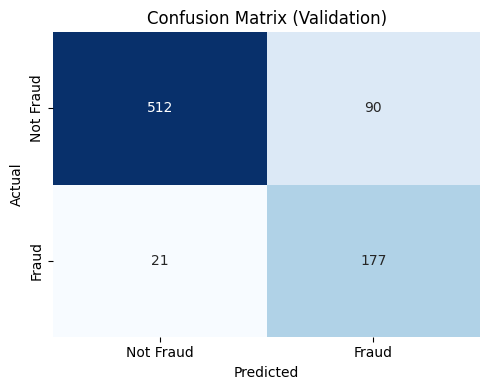

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_val, y_val_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()


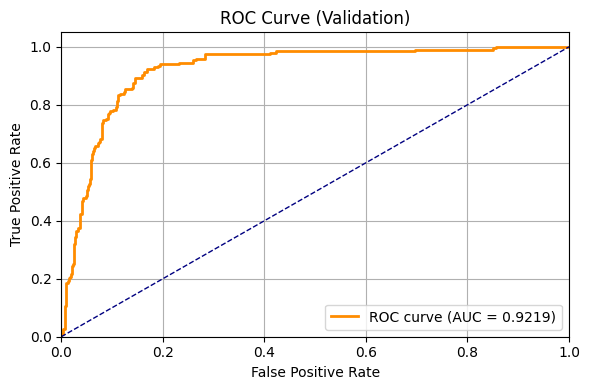

In [ ]:
from sklearn.metrics import roc_curve, auc

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Validation)')
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            SHAP Analysis
            </span>   
        </font>    
</h3>

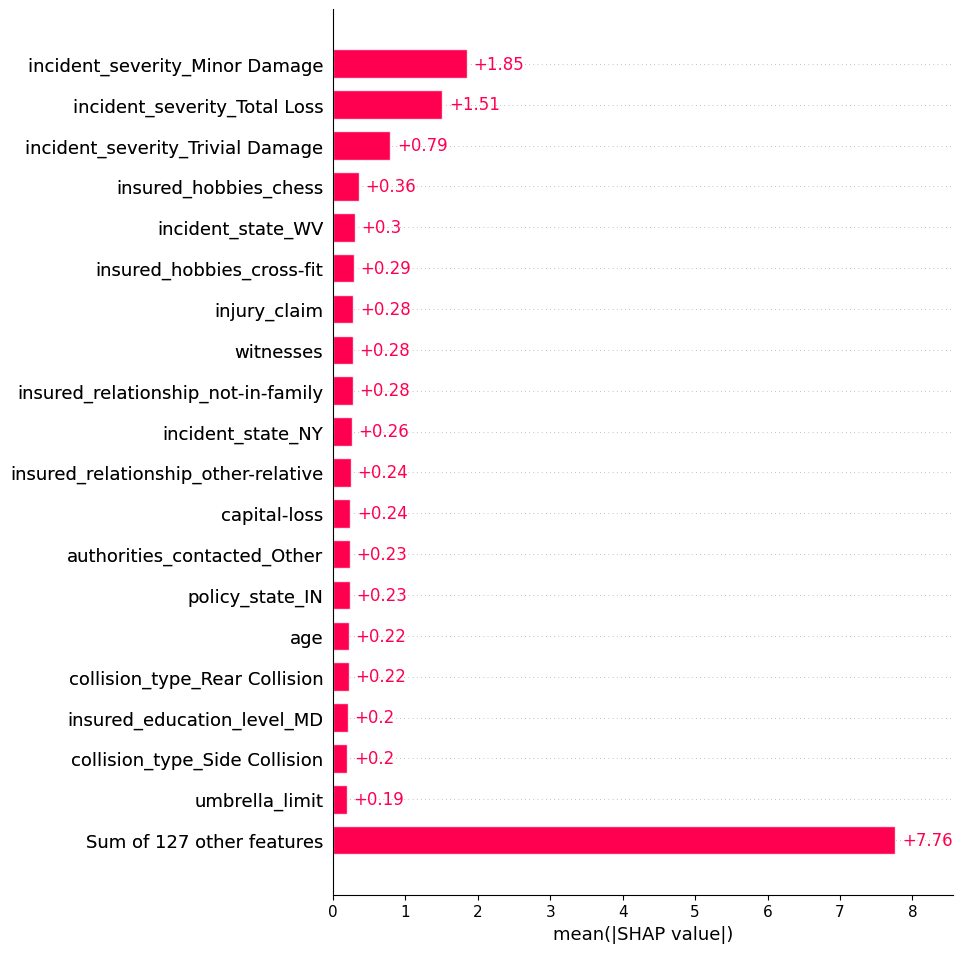

In [ ]:
import shap
import matplotlib.pyplot as plt

# SHAP requires X_val_scaled as a numpy array and feature names
# We already converted X_val_scaled back to DataFrame with proper columns:
# --> use it directly if available
X_val_shap = X_val_scaled.copy()

# Create the SHAP explainer (use LinearExplainer for logistic regression)
explainer = shap.Explainer(lr, X_val_shap)
shap_values = explainer(X_val_shap)

# SHAP summary plot
shap.plots.bar(shap_values, max_display=20)

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.2 Logistic Regression using SMOTE
            </span>   
        </font>    
</h3>

In [ ]:
# SMOTE + Logistic Regression (using your pre-scaled X_train_scaled / X_val_scaled)
# --------------------------------------------------
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_auc_score, roc_curve)
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1.  Oversample ONLY the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# 2.  Fit Logistic Regression (no need for class_weight now; classes are balanced)
lr_smote = LogisticRegression(max_iter=1000, solver='lbfgs')
lr_smote.fit(X_train_res, y_train_res)

# 3.  Predict on the untouched validation set
y_val_pred  = lr_smote.predict(X_val_scaled)
y_val_prob  = lr_smote.predict_proba(X_val_scaled)[:, 1]

In [ ]:
# 4.  Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[507  95]
 [ 22 176]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9584    0.8422    0.8966       602
           1     0.6494    0.8889    0.7505       198

    accuracy                         0.8538       800
   macro avg     0.8039    0.8655    0.8235       800
weighted avg     0.8819    0.8538    0.8604       800

ROC-AUC (Validation): 0.9184


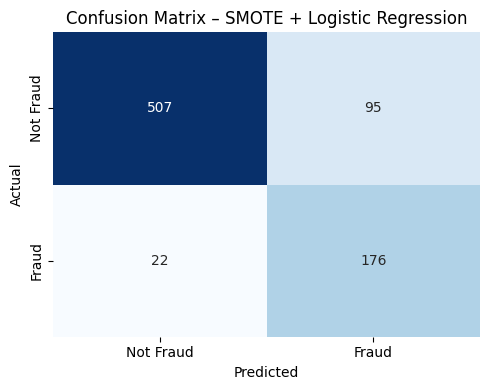

In [ ]:
# 5.  Plot Confusion Matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud','Fraud'], yticklabels=['Not Fraud','Fraud'])
plt.title("Confusion Matrix – SMOTE + Logistic Regression")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

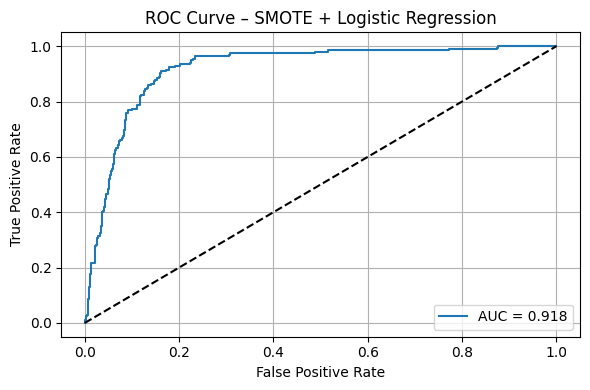

In [ ]:
# 6.  ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_val, y_val_prob):.3f}')
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SMOTE + Logistic Regression")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.3 KNN Classifier
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

In [ ]:
# 1. Fit KNN
# --------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this later
knn.fit(X_train_scaled, y_train)

# --------------------------------------------------
# 2. Predict
# --------------------------------------------------
y_val_pred  = knn.predict(X_val_scaled)
y_val_prob  = knn.predict_proba(X_val_scaled)[:, 1]

In [ ]:
# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


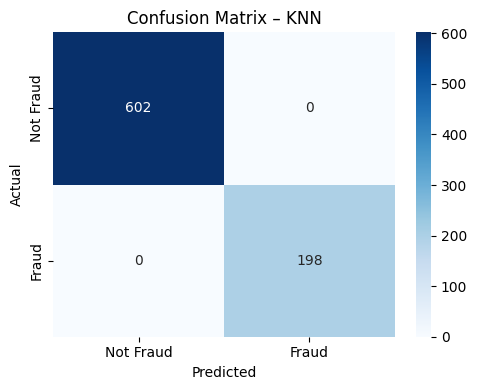

In [ ]:
# 4. Confusion Matrix Plot
# --------------------------------------------------
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

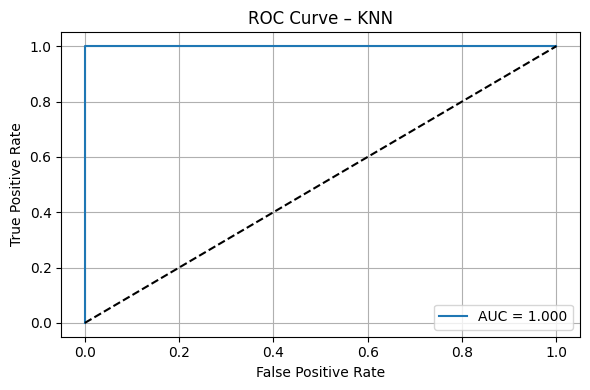

In [ ]:
# 5. ROC Curve
# --------------------------------------------------
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Diagnosing high accuracy

In [ ]:
correlations = X_full.copy()
correlations['fraud_reported'] = y_full
print(correlations.corr()['fraud_reported'].sort_values(ascending=False))

fraud_reported                      1.000000
insured_hobbies_chess               0.294851
insured_hobbies_cross-fit           0.218968
vehicle_claim                       0.169994
sum_claims                          0.163624
                                      ...   
incident_type_Vehicle Theft        -0.120916
incident_severity_Trivial Damage   -0.131501
authorities_contacted_Unknown      -0.132840
incident_severity_Total Loss       -0.171247
incident_severity_Minor Damage     -0.239716
Name: fraud_reported, Length: 147, dtype: float64


In [ ]:
# Combine features and target
corr_df = X_full.copy()
corr_df['fraud_reported'] = y_full

# Check correlations with the target
correlations = corr_df.corr(numeric_only=True)['fraud_reported'].sort_values(ascending=False)
print(correlations)

fraud_reported                      1.000000
insured_hobbies_chess               0.294851
insured_hobbies_cross-fit           0.218968
vehicle_claim                       0.169994
sum_claims                          0.163624
                                      ...   
incident_type_Vehicle Theft        -0.120916
incident_severity_Trivial Damage   -0.131501
authorities_contacted_Unknown      -0.132840
incident_severity_Total Loss       -0.171247
incident_severity_Minor Damage     -0.239716
Name: fraud_reported, Length: 147, dtype: float64


In [ ]:
# Filter features with high absolute correlation
leakage_candidates = correlations[correlations.abs() > 0.9].drop('fraud_reported')

# Display them
print("🔍 Potential Leakage Features (|correlation| > 0.9):")
print(leakage_candidates.sort_values(ascending=False))

🔍 Potential Leakage Features (|correlation| > 0.9):
Series([], Name: fraud_reported, dtype: float64)


In [ ]:
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df.groupby(col)['fraud_reported'].value_counts(normalize=True).unstack().fillna(0).round(4))


--- policy_state ---
fraud_reported       0       1
policy_state                  
IL              0.7722  0.2278
IN              0.7452  0.2548
OH              0.7415  0.2585

--- policy_csl ---
fraud_reported       0       1
policy_csl                    
100/300         0.7421  0.2579
250/500         0.7379  0.2621
500/1000        0.7833  0.2167

--- insured_sex ---
fraud_reported       0       1
insured_sex                   
FEMALE          0.7654  0.2346
MALE            0.7387  0.2613

--- insured_education_level ---
fraud_reported                0       1
insured_education_level                
Associate                0.7655  0.2345
College                  0.7377  0.2623
High School              0.7750  0.2250
JD                       0.7391  0.2609
MD                       0.7361  0.2639
Masters                  0.7762  0.2238
PhD                      0.7360  0.2640

--- insured_occupation ---
fraud_reported           0       1
insured_occupation                
adm-clerical

In [ ]:
df_filtered = df[
    ~df['insured_hobbies'].isin(['chess', 'cross-fit']) &
    ~df['auto_model'].isin(['X6', 'Silverado', 'ML350', 'Tahoe', 'Civic', 'F150', 'C300'])
]

In [ ]:
# --------------------------------------------------
# 1. FEATURE / TARGET SPLIT
# --------------------------------------------------
X = df_filtered.drop(columns=['fraud_reported'])
y = df_filtered['fraud_reported']

# --------------------------------------------------
# 2. NUMERIC / CATEGORICAL (use existing lists)
# --------------------------------------------------
# These should already be defined, but redefining just in case
numeric_cols = [
    'months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
    'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
    'injury_claim', 'property_claim', 'vehicle_claim',
    'auto_year', 'days_since_policy', 'sum_claims', 'vehicle_age_at_incident'
]
categorical_cols = [c for c in X.columns if c not in numeric_cols]

# --------------------------------------------------
# 3. ONE-HOT ENCODE CATEGORICALS
# --------------------------------------------------
df_cat = pd.get_dummies(X[categorical_cols], drop_first=True, dtype=int)
df_num = X[numeric_cols]

X_full = pd.concat([df_num, df_cat], axis=1)

# --------------------------------------------------
# 4. TRAIN / VALID / TEST SPLIT (80/10/10)
# --------------------------------------------------
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y, test_size=0.10, stratify=y, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=42)
# 0.1111 × 0.9 ≈ 0.10 → validation set is ~10%

# --------------------------------------------------
# 5. SCALE NUMERIC FEATURES
# --------------------------------------------------
scaler = StandardScaler()

# Get numeric column indices
num_idx = [X_train.columns.get_loc(c) for c in numeric_cols]

# Convert to NumPy
X_train_np = X_train.values.copy()
X_val_np   = X_val.values.copy()
X_test_np  = X_test.values.copy()

# Fit only on train set
scaler.fit(X_train_np[:, num_idx])

# Transform
X_train_np[:, num_idx] = scaler.transform(X_train_np[:, num_idx])
X_val_np[:, num_idx]   = scaler.transform(X_val_np[:, num_idx])
X_test_np[:, num_idx]  = scaler.transform(X_test_np[:, num_idx])

# Back to DataFrames
X_train_scaled = pd.DataFrame(X_train_np, columns=X_train.columns, index=X_train.index)
X_val_scaled   = pd.DataFrame(X_val_np,   columns=X_val.columns,   index=X_val.index)
X_test_scaled  = pd.DataFrame(X_test_np,  columns=X_test.columns,  index=X_test.index)

In [ ]:
# 1. Fit KNN
# --------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)  # You can tune this later
knn.fit(X_train_scaled, y_train)

# --------------------------------------------------
# 2. Predict
# --------------------------------------------------
y_val_pred  = knn.predict(X_val_scaled)
y_val_prob  = knn.predict_proba(X_val_scaled)[:, 1]

In [ ]:
# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[517   1]
 [  2 112]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9961    0.9981    0.9971       518
           1     0.9912    0.9825    0.9868       114

    accuracy                         0.9953       632
   macro avg     0.9936    0.9903    0.9919       632
weighted avg     0.9952    0.9953    0.9952       632

ROC-AUC (Validation): 0.9999


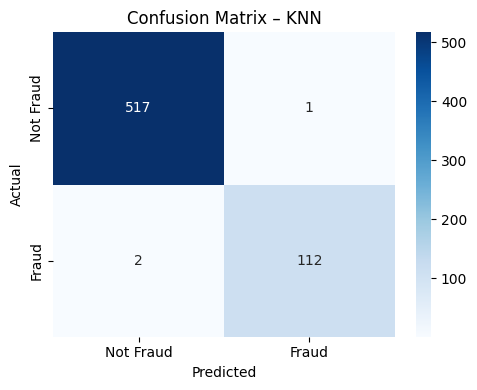

In [ ]:
# 4. Confusion Matrix Plot
# --------------------------------------------------
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

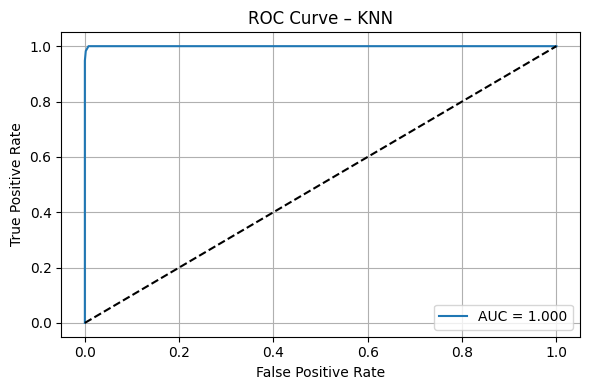

In [ ]:
# 5. ROC Curve
# --------------------------------------------------
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

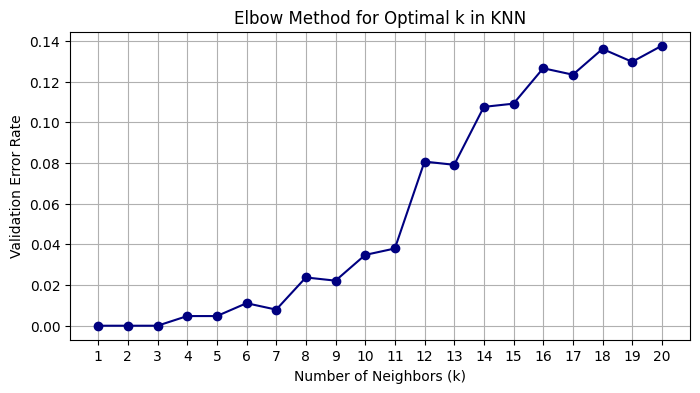

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

error_rates = []
k_range = range(1, 21)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_val_scaled)
    error = 1 - accuracy_score(y_val, y_val_pred)
    error_rates.append(error)

# Plotting the elbow
plt.figure(figsize=(8, 4))
plt.plot(k_range, error_rates, marker='o', linestyle='-', color='navy')
plt.xticks(k_range)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Validation Error Rate')
plt.title('Elbow Method for Optimal k in KNN')
plt.grid(True)
plt.show()

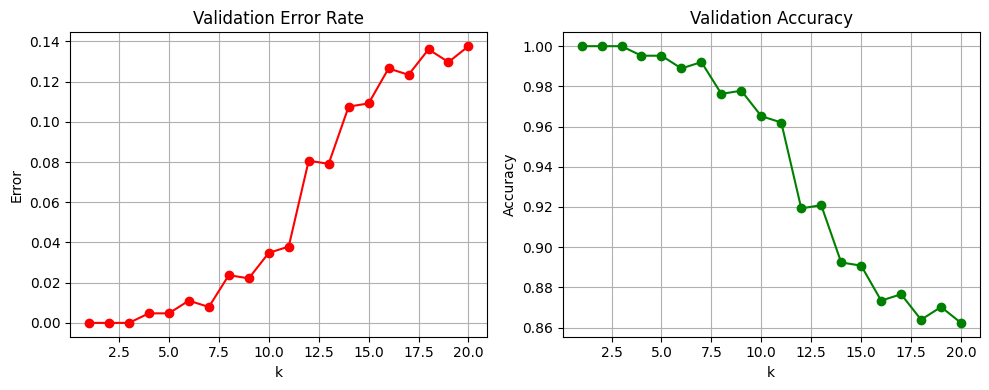

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

k_range = range(1, 21)
errors = []
accuracies = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_val_scaled)

    acc = accuracy_score(y_val, y_pred)
    errors.append(1 - acc)
    accuracies.append(acc)

# Plot both
plt.figure(figsize=(10, 4))

# Error rate
plt.subplot(1, 2, 1)
plt.plot(k_range, errors, marker='o', color='red')
plt.title('Validation Error Rate')
plt.xlabel('k')
plt.ylabel('Error')
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(k_range, accuracies, marker='o', color='green')
plt.title('Validation Accuracy')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of k values to try
k_range = range(1, 31)

# Lists to store accuracy and error
train_acc = []
val_acc = []
train_err = []
val_err = []

# Loop over k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_train_pred = knn.predict(X_train_scaled)
    y_val_pred   = knn.predict(X_val_scaled)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    val_accuracy   = accuracy_score(y_val, y_val_pred)

    # Store accuracy
    train_acc.append(train_accuracy)
    val_acc.append(val_accuracy)

    # Store error = 1 - accuracy
    train_err.append(1 - train_accuracy)
    val_err.append(1 - val_accuracy)

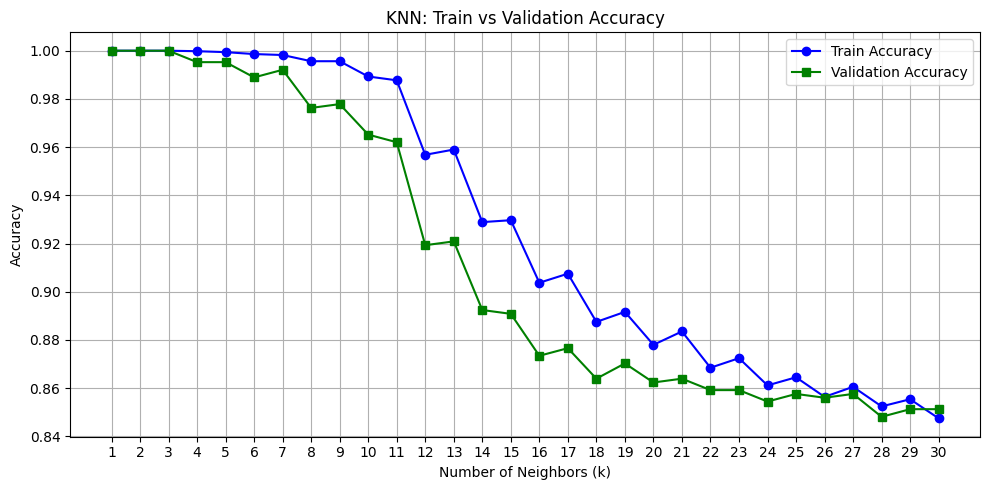

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_acc, marker='o', label='Train Accuracy', color='blue')
plt.plot(k_range, val_acc, marker='s', label='Validation Accuracy', color='green')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN: Train vs Validation Accuracy')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

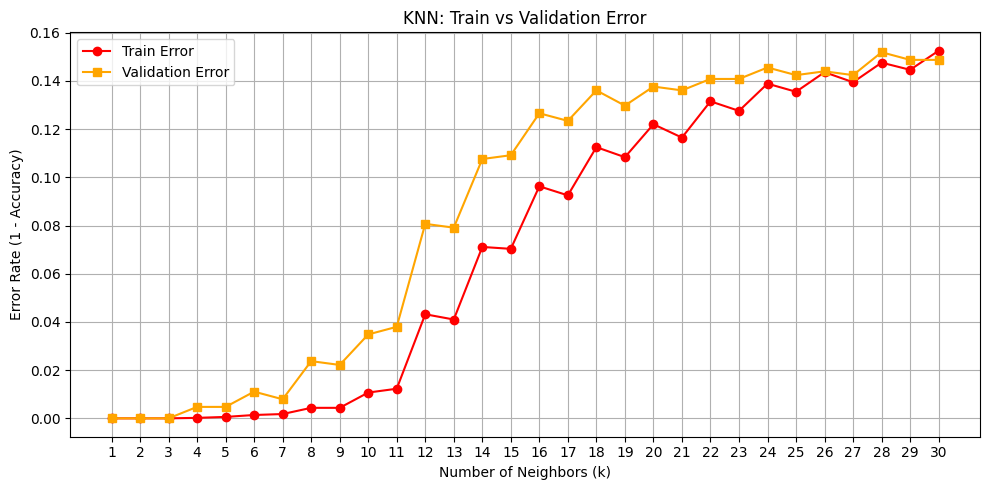

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_range, train_err, marker='o', label='Train Error', color='red')
plt.plot(k_range, val_err, marker='s', label='Validation Error', color='orange')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate (1 - Accuracy)')
plt.title('KNN: Train vs Validation Error')
plt.xticks(k_range)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Sanity Check on Test

In [ ]:
y_test_pred = knn.predict(X_test_scaled)
y_test_prob = knn.predict_proba(X_test_scaled)[:, 1]

print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred, digits=4))
print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

[[514   4]
 [  3 111]]
              precision    recall  f1-score   support

           0     0.9942    0.9923    0.9932       518
           1     0.9652    0.9737    0.9694       114

    accuracy                         0.9889       632
   macro avg     0.9797    0.9830    0.9813       632
weighted avg     0.9890    0.9889    0.9889       632

ROC-AUC (Test): 0.9997


<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            SHAP Analysis
            </span>   
        </font>    
</h3>

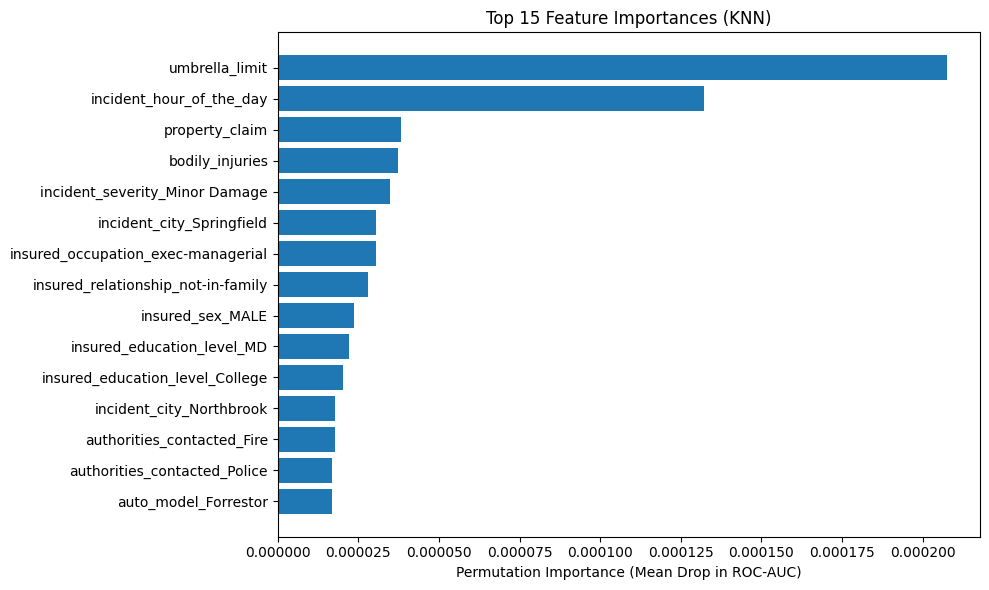

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# Run permutation importance on the validation set
result = permutation_importance(knn, X_val_scaled, y_val, scoring='roc_auc', n_repeats=10, random_state=42)

# Extract importance values
importances = result.importances_mean
features = X_val_scaled.columns

# Sort and plot top 15
sorted_idx = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_idx][:15][::-1], importances[sorted_idx][:15][::-1])
plt.xlabel("Permutation Importance (Mean Drop in ROC-AUC)")
plt.title("Top 15 Feature Importances (KNN)")
plt.tight_layout()
plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.4 SVM
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 1. Fit SVM
# --------------------------------------------------
svm = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True, class_weight='balanced', random_state=42)
svm.fit(X_train_scaled, y_train)

# --------------------------------------------------
# 2. Predict
# --------------------------------------------------
y_val_pred  = svm.predict(X_val_scaled)
y_val_prob  = svm.predict_proba(X_val_scaled)[:, 1]  # probability for ROC

In [ ]:

# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[601   1]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    0.9983    0.9992       602
           1     0.9950    1.0000    0.9975       198

    accuracy                         0.9988       800
   macro avg     0.9975    0.9992    0.9983       800
weighted avg     0.9988    0.9988    0.9988       800

ROC-AUC (Validation): 1.0000


In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, val_scores = learning_curve(
    svm, X_full, y_full, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 5)
)

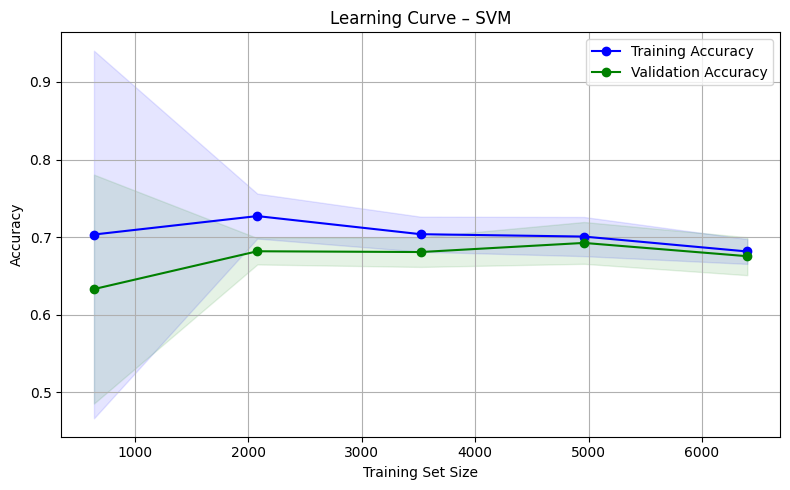

In [ ]:
train_mean = np.mean(train_scores, axis=1)
train_std  = np.std(train_scores, axis=1)
val_mean   = np.mean(val_scores, axis=1)
val_std    = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy", color="blue")
plt.plot(train_sizes, val_mean, 'o-', label="Validation Accuracy", color="green")

# Shaded region for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.1, color="green")

plt.title("Learning Curve – SVM")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Variable Selection
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features (e.g., k=20 — you can tune this)
k = 20
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_mask = selector.get_support()
selected_features = X_train_scaled.columns[selected_mask]

print("Selected Features:", list(selected_features))

# Subset data
X_train_sel = X_train_scaled[selected_features]
X_val_sel   = X_val_scaled[selected_features]
X_test_sel  = X_test_scaled[selected_features]

Selected Features: ['injury_claim', 'property_claim', 'vehicle_claim', 'sum_claims', 'insured_occupation_exec-managerial', 'insured_hobbies_camping', 'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_hobbies_golf', 'insured_hobbies_kayaking', 'incident_type_Parked Car', 'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft', 'collision_type_Rear Collision', 'incident_severity_Minor Damage', 'incident_severity_Total Loss', 'incident_severity_Trivial Damage', 'authorities_contacted_Other', 'authorities_contacted_Unknown', 'incident_state_WV']


=== Confusion Matrix (Validation) ===
[[522  80]
 [ 20 178]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9631    0.8671    0.9126       602
           1     0.6899    0.8990    0.7807       198

    accuracy                         0.8750       800
   macro avg     0.8265    0.8830    0.8466       800
weighted avg     0.8955    0.8750    0.8799       800

ROC-AUC (Validation): 0.9351


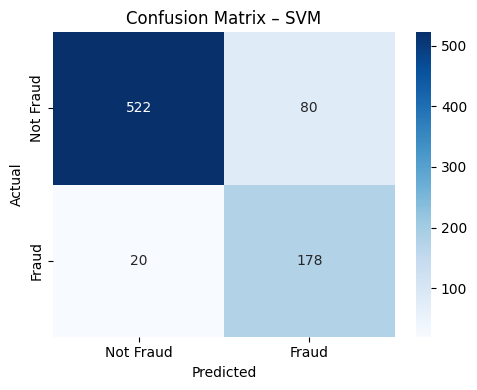

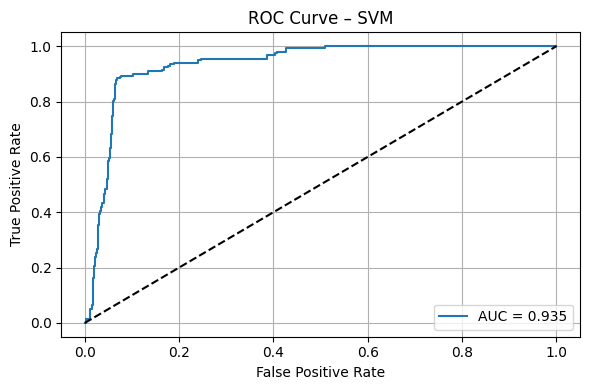

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train
svm = SVC(kernel='rbf', probability=True, class_weight='balanced')
svm.fit(X_train_sel, y_train)

# 2. Predict
y_val_pred = svm.predict(X_val_sel)
y_val_prob = svm.predict_proba(X_val_sel)[:, 1]

# 3. Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")
print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))
print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

=== Confusion Matrix (Validation) ===
[[601   1]
 [  3 195]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9950    0.9983    0.9967       602
           1     0.9949    0.9848    0.9898       198

    accuracy                         0.9950       800
   macro avg     0.9950    0.9916    0.9933       800
weighted avg     0.9950    0.9950    0.9950       800

ROC-AUC (Validation): 0.9999


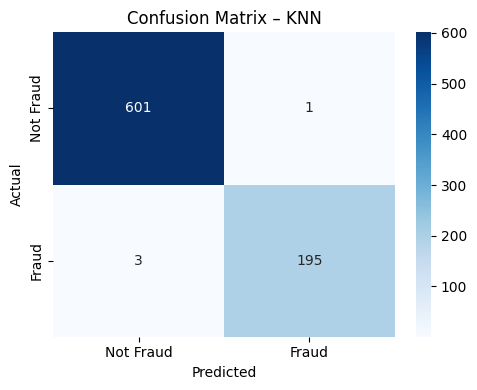

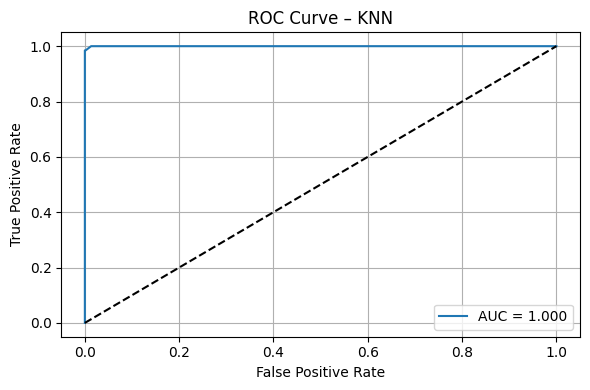

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sel, y_train)

# 2. Predict
y_val_pred = knn.predict(X_val_sel)
y_val_prob = knn.predict_proba(X_val_sel)[:, 1]

# 3. Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")
print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))
print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

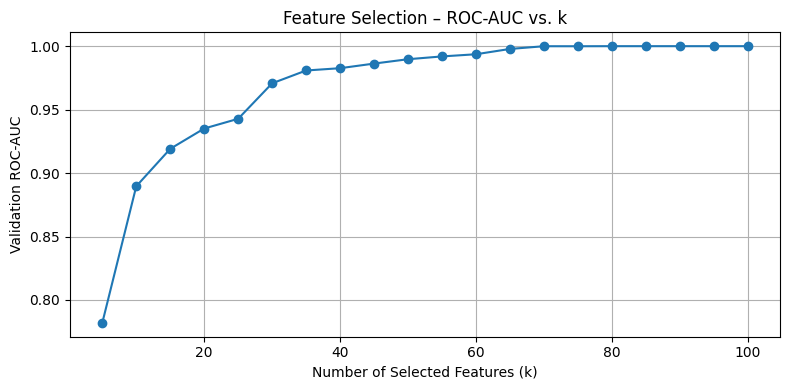

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score

k_values = list(range(5, 101, 5))  # Try k from 5 to 100 in steps of 5
auc_scores = []

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train_scaled, y_train)

    selected_features = X_train_scaled.columns[selector.get_support()]
    X_train_k = X_train_scaled[selected_features]
    X_val_k   = X_val_scaled[selected_features]

    model = SVC(kernel='rbf', probability=True, class_weight='balanced')
    model.fit(X_train_k, y_train)
    y_val_prob = model.predict_proba(X_val_k)[:, 1]

    auc = roc_auc_score(y_val, y_val_prob)
    auc_scores.append(auc)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
plt.plot(k_values, auc_scores, marker='o')
plt.xlabel("Number of Selected Features (k)")
plt.ylabel("Validation ROC-AUC")
plt.title("Feature Selection – ROC-AUC vs. k")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features (e.g., k=20 — you can tune this)
k = 25
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_mask = selector.get_support()
selected_features = X_train_scaled.columns[selected_mask]

print("Selected Features:", list(selected_features))

# Subset data
X_train_sel = X_train_scaled[selected_features]
X_val_sel   = X_val_scaled[selected_features]
X_test_sel  = X_test_scaled[selected_features]

Selected Features: ['injury_claim', 'property_claim', 'vehicle_claim', 'sum_claims', 'insured_occupation_exec-managerial', 'insured_hobbies_camping', 'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_hobbies_dancing', 'insured_hobbies_golf', 'insured_hobbies_kayaking', 'incident_type_Parked Car', 'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft', 'collision_type_Rear Collision', 'incident_severity_Minor Damage', 'incident_severity_Total Loss', 'incident_severity_Trivial Damage', 'authorities_contacted_Other', 'authorities_contacted_Unknown', 'incident_state_OH', 'incident_state_SC', 'incident_state_WV', 'auto_model_Malibu', 'auto_model_Silverado']


=== Confusion Matrix (Validation) ===
[[528  74]
 [ 20 178]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9635    0.8771    0.9183       602
           1     0.7063    0.8990    0.7911       198

    accuracy                         0.8825       800
   macro avg     0.8349    0.8880    0.8547       800
weighted avg     0.8999    0.8825    0.8868       800

ROC-AUC (Validation): 0.9428


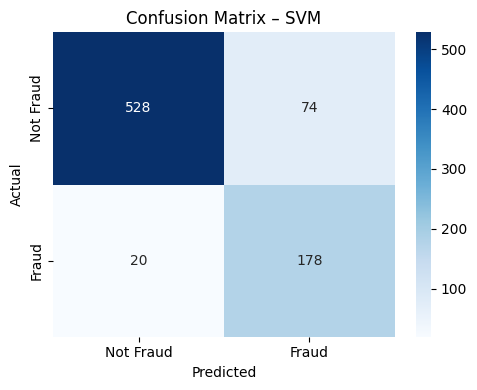

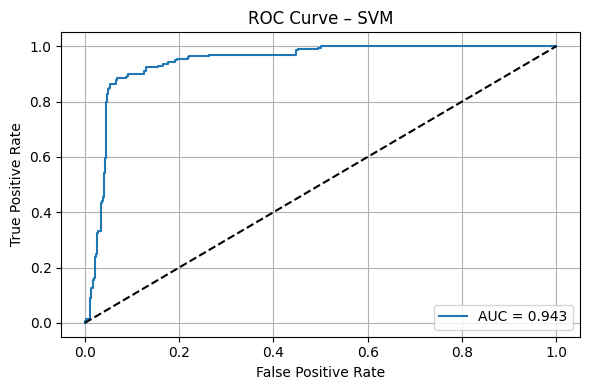

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train
svm = SVC(kernel='rbf', probability=True, class_weight='balanced')
svm.fit(X_train_sel, y_train)

# 2. Predict
y_val_pred = svm.predict(X_val_sel)
y_val_prob = svm.predict_proba(X_val_sel)[:, 1]

# 3. Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")
print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))
print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – SVM")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

=== Confusion Matrix (Validation) ===
[[601   1]
 [  1 197]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9983    0.9983    0.9983       602
           1     0.9949    0.9949    0.9949       198

    accuracy                         0.9975       800
   macro avg     0.9966    0.9966    0.9966       800
weighted avg     0.9975    0.9975    0.9975       800

ROC-AUC (Validation): 1.0000


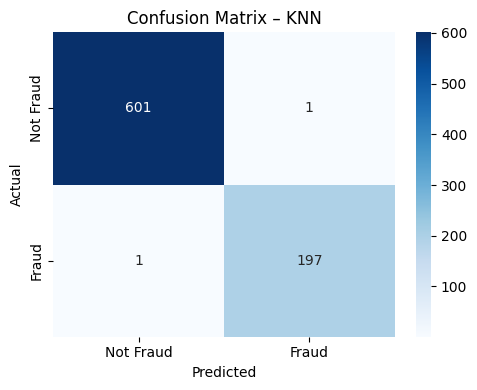

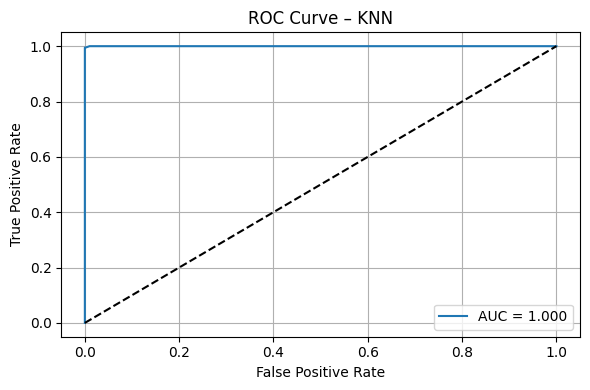

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# 1. Train
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sel, y_train)

# 2. Predict
y_val_pred = knn.predict(X_val_sel)
y_val_prob = knn.predict_proba(X_val_sel)[:, 1]

# 3. Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")
print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))
print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.5 Decision Trees
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# 1. Fit Decision Tree
# --------------------------------------------------
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=5)  # you can tune this
dt.fit(X_train_scaled, y_train)

# --------------------------------------------------
# 2. Predict
# --------------------------------------------------
y_val_pred = dt.predict(X_val_scaled)
y_val_prob = dt.predict_proba(X_val_scaled)[:, 1]

In [ ]:
# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[506  96]
 [ 25 173]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9529    0.8405    0.8932       602
           1     0.6431    0.8737    0.7409       198

    accuracy                         0.8488       800
   macro avg     0.7980    0.8571    0.8171       800
weighted avg     0.8762    0.8488    0.8555       800

ROC-AUC (Validation): 0.8694


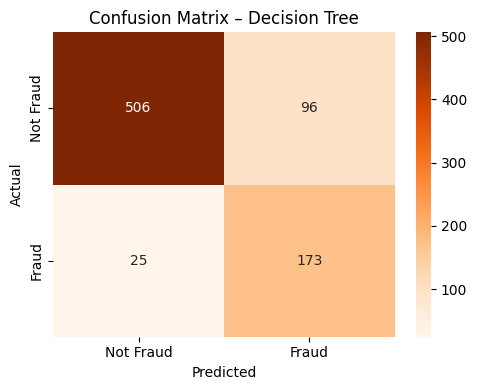

In [ ]:
# 4. Confusion Matrix Plot
# --------------------------------------------------
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

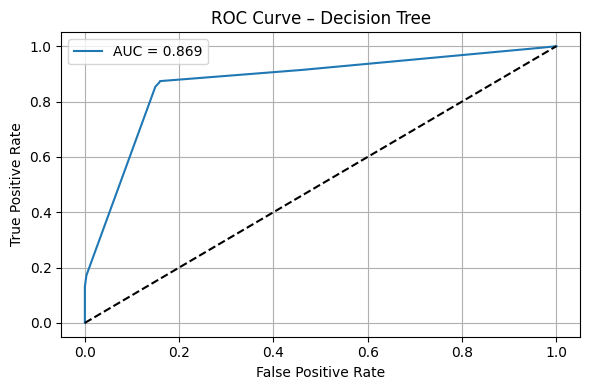

In [ ]:
# 5. ROC Curve
# --------------------------------------------------
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.6 Random Forest
            </span>   
        </font>    
</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# 1. Fit Random Forest
# --------------------------------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_scaled, y_train)

# --------------------------------------------------
# 2. Predict
# --------------------------------------------------
y_val_pred = rf.predict(X_val_scaled)
y_val_prob = rf.predict_proba(X_val_scaled)[:, 1]

In [ ]:
# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


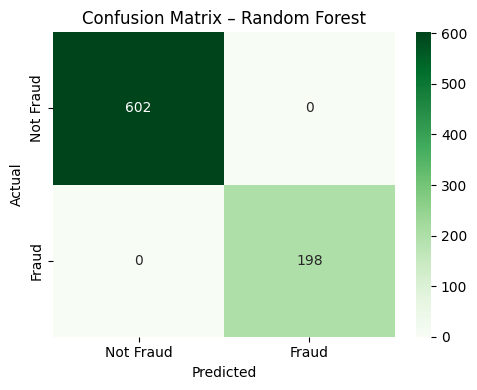

In [ ]:
# 4. Confusion Matrix Plot
# --------------------------------------------------
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Random Forest")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

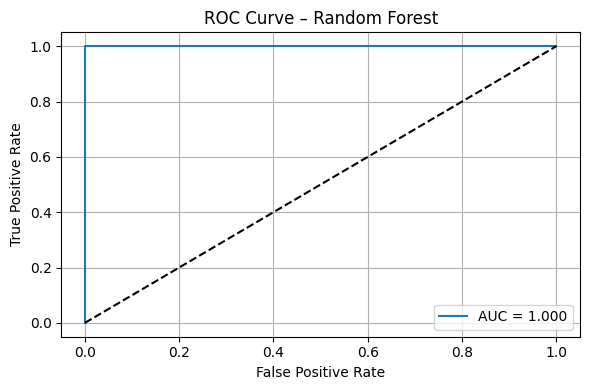

In [ ]:
# 5. ROC Curve
# --------------------------------------------------
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

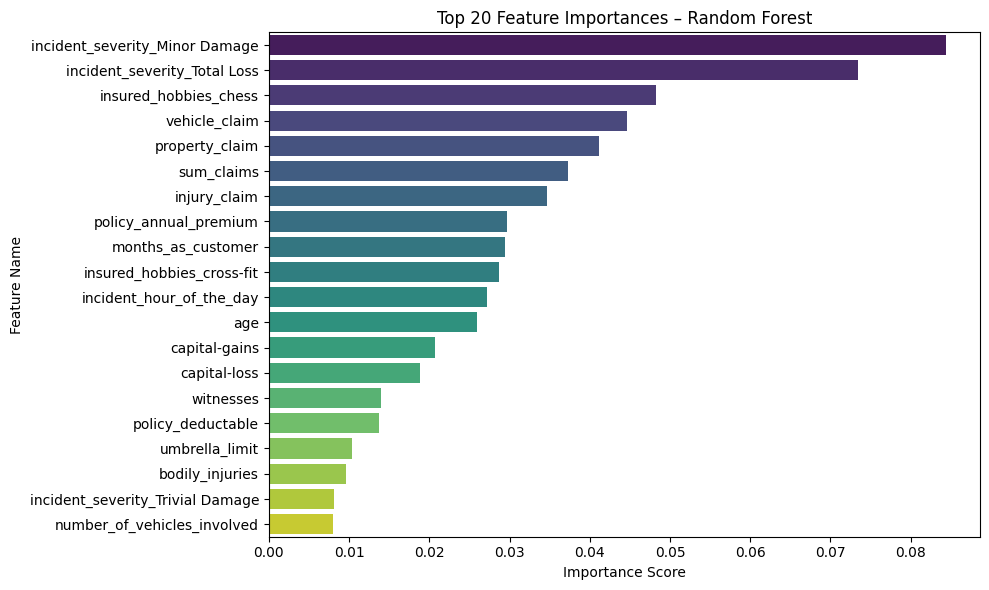

In [ ]:
# 1. Get feature importances
importances = rf.feature_importances_  # rf = your trained RandomForestClassifier
feature_names = X_train_scaled.columns  # Assuming you're using selected features

# 2. Create a DataFrame for sorting and plotting
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. Plot Top 20 Important Features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(20), palette='viridis')
plt.title('Top 20 Feature Importances – Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

In [ ]:
feat_imp_df

Feature  Importance
72   incident_severity_Minor Damage    0.084415
73     incident_severity_Total Loss    0.073432
46            insured_hobbies_chess    0.048231
13                    vehicle_claim    0.044593
12                   property_claim    0.041195
..                              ...         ...
142               auto_model_Ultima    0.000948
133               auto_model_Maxima    0.000945
138                  auto_model_RSX    0.000882
129                   auto_model_M5    0.000758
113               auto_model_Accord    0.000403

[146 rows x 2 columns]

Filtering out low importance features and fitting again

In [ ]:
# Assuming rf is your trained RandomForestClassifier
importances = rf.feature_importances_
feature_names = X_train_scaled.columns

# Create a DataFrame of features and importance
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False, inplace=True)

# Drop features with very low importance (e.g., < 0.005)
important_feats = feat_imp_df[feat_imp_df['Importance'] >= 0.01]['Feature'].tolist()

print(f"Selected {len(important_feats)} important features out of {len(feature_names)} total.")

Selected 17 important features out of 146 total.


In [ ]:
X_train_imp = X_train_scaled[important_feats]
X_val_imp   = X_val_scaled[important_feats]
X_test_imp  = X_test_scaled[important_feats]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

rf_reduced = RandomForestClassifier(n_estimators=100, random_state=42)
rf_reduced.fit(X_train_imp, y_train)

# Predict
y_val_pred = rf_reduced.predict(X_val_imp)
y_val_prob = rf_reduced.predict_proba(X_val_imp)[:, 1]

# Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


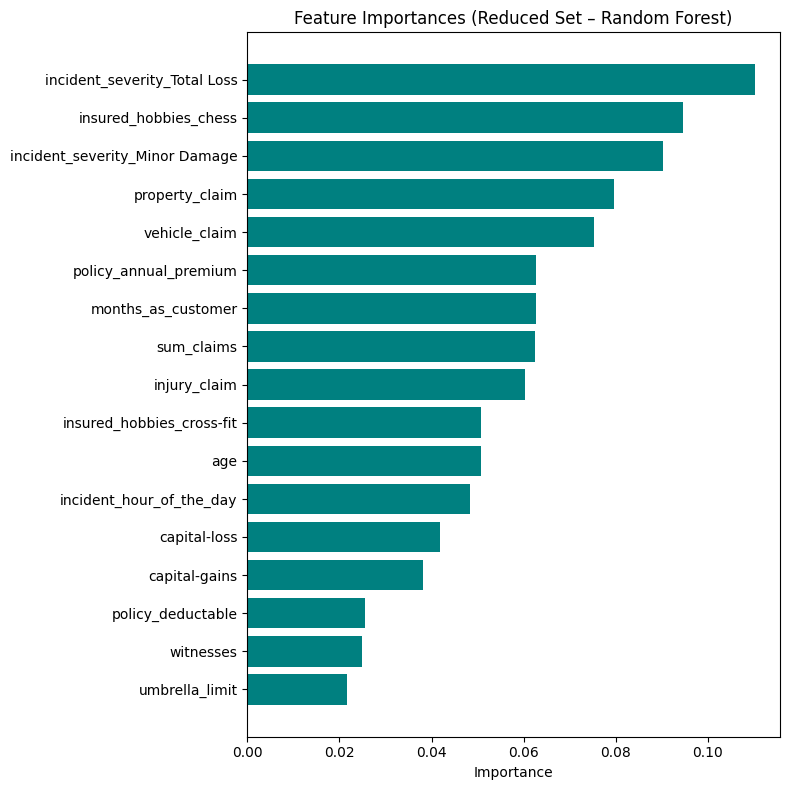

In [ ]:
imp_df = pd.DataFrame({
    'Feature': important_feats,
    'Importance': rf_reduced.feature_importances_
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, len(imp_df) // 2))
plt.barh(imp_df['Feature'], imp_df['Importance'], color='teal')
plt.title("Feature Importances (Reduced Set – Random Forest)")
plt.xlabel("Importance")
plt.tight_layout()
plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Variable Selection
            </span>   
        </font>    
</h3>

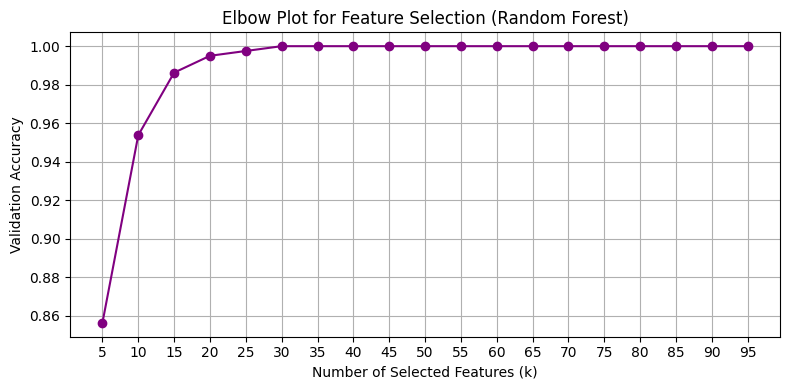

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Range of k values to test
k_values = list(range(5, min(100, X_train_scaled.shape[1]), 5))
val_scores = []

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    selector.fit(X_train_scaled, y_train)

    # Select features
    X_train_k = selector.transform(X_train_scaled)
    X_val_k   = selector.transform(X_val_scaled)

    # Fit Random Forest
    rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
    rf.fit(X_train_k, y_train)

    # Predict on validation set
    y_val_pred = rf.predict(X_val_k)
    acc = accuracy_score(y_val, y_val_pred)
    val_scores.append(acc)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(k_values, val_scores, marker='o', color='purple')
plt.xlabel('Number of Selected Features (k)')
plt.ylabel('Validation Accuracy')
plt.title('Elbow Plot for Feature Selection (Random Forest)')
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

# Select top k features (e.g., k=20 — you can tune this)
k = 20
selector = SelectKBest(score_func=f_classif, k=k)
selector.fit(X_train_scaled, y_train)

# Get the selected feature names
selected_mask = selector.get_support()
selected_features = X_train_scaled.columns[selected_mask]

print("Selected Features:", list(selected_features))

# Subset data
X_train_sel = X_train_scaled[selected_features]
X_val_sel   = X_val_scaled[selected_features]
X_test_sel  = X_test_scaled[selected_features]

Selected Features: ['injury_claim', 'property_claim', 'vehicle_claim', 'sum_claims', 'insured_occupation_exec-managerial', 'insured_hobbies_camping', 'insured_hobbies_chess', 'insured_hobbies_cross-fit', 'insured_hobbies_golf', 'insured_hobbies_kayaking', 'incident_type_Parked Car', 'incident_type_Single Vehicle Collision', 'incident_type_Vehicle Theft', 'collision_type_Rear Collision', 'incident_severity_Minor Damage', 'incident_severity_Total Loss', 'incident_severity_Trivial Damage', 'authorities_contacted_Other', 'authorities_contacted_Unknown', 'incident_state_WV']


=== Confusion Matrix (Validation) ===
[[601   1]
 [  3 195]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9950    0.9983    0.9967       602
           1     0.9949    0.9848    0.9898       198

    accuracy                         0.9950       800
   macro avg     0.9950    0.9916    0.9933       800
weighted avg     0.9950    0.9950    0.9950       800

ROC-AUC (Validation): 0.9999


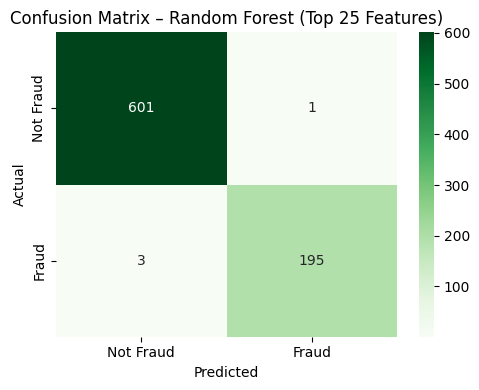

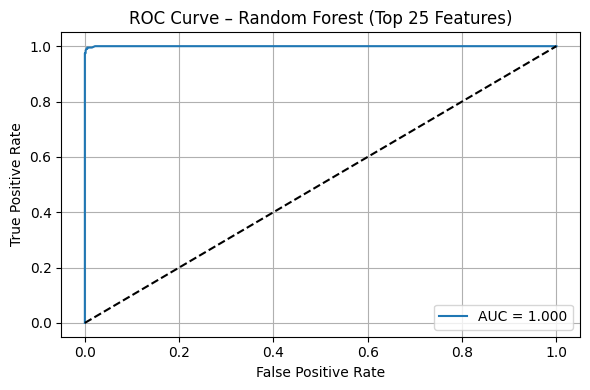

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------------------------------------
# 1. Fit Random Forest on Selected Features
# --------------------------------------------------
rf_sel = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_sel.fit(X_train_sel, y_train)

# --------------------------------------------------
# 2. Predict
# --------------------------------------------------
y_val_pred = rf_sel.predict(X_val_sel)
y_val_prob = rf_sel.predict_proba(X_val_sel)[:, 1]

# --------------------------------------------------
# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# --------------------------------------------------
# 4. Confusion Matrix Plot
# --------------------------------------------------
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Random Forest (Top 25 Features)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

# --------------------------------------------------
# 5. ROC Curve
# --------------------------------------------------
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (Top 25 Features)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            6.7 XGBoost
            </span>   
        </font>    
</h3>

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [ ]:
# 1. Fit XGBoost
xgb = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb.fit(X_train_scaled, y_train)

# 2. Predict
y_val_pred = xgb.predict(X_val_scaled)
y_val_prob = xgb.predict_proba(X_val_scaled)[:, 1]

In [ ]:
# 3. Evaluation Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[594   8]
 [ 21 177]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9659    0.9867    0.9762       602
           1     0.9568    0.8939    0.9243       198

    accuracy                         0.9637       800
   macro avg     0.9613    0.9403    0.9502       800
weighted avg     0.9636    0.9637    0.9633       800

ROC-AUC (Validation): 0.9893


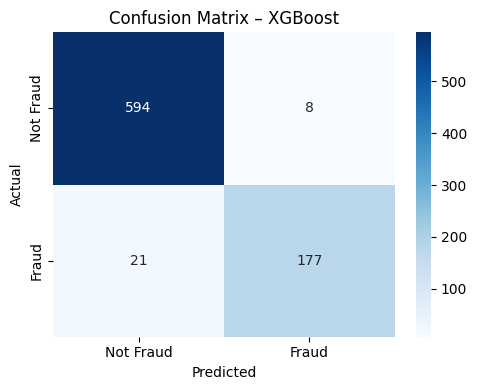

In [ ]:
# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

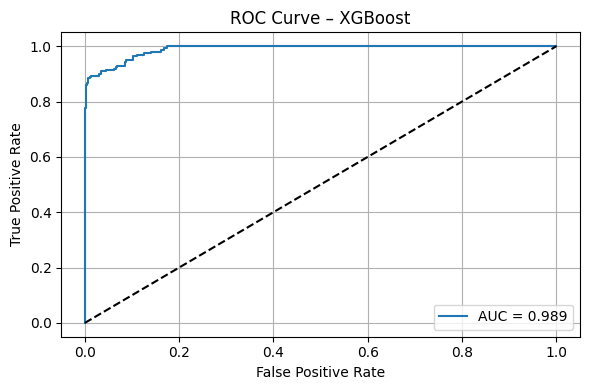

In [ ]:
# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            PCA Analysis
            </span>   
        </font>    
</h3>

In [ ]:
df.columns

Index(['months_as_customer', 'age', 'policy_state', 'policy_csl',
       'policy_deductable', 'policy_annual_premium', 'umbrella_limit',
       'insured_sex', 'insured_education_level', 'insured_occupation',
       'insured_hobbies', 'insured_relationship', 'capital-gains',
       'capital-loss', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'injury_claim', 'property_claim',
       'vehicle_claim', 'auto_make', 'auto_model', 'auto_year',
       'fraud_reported', 'days_since_policy', 'sum_claims',
       'vehicle_age_at_incident'],
      dtype='object')

In [ ]:
df.drop('sum_claims',axis=1,inplace=True)

In [ ]:
df = df.drop(columns=['insured_hobbies', 'incident_severity'])

In [ ]:
df.shape

(8000, 33)

In [ ]:
# 2.  FEATURE / TARGET SPLIT
# --------------------------------------------------
X = df.drop(columns=['fraud_reported'])
y = df['fraud_reported']

In [ ]:
# 2.  NUMERIC vs CATEGORICAL LISTS
# --------------------------------------------------
numeric_cols = [
    'months_as_customer', 'age', 'policy_deductable', 'policy_annual_premium',
    'umbrella_limit', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day',
    'number_of_vehicles_involved', 'bodily_injuries', 'witnesses',
    'injury_claim', 'property_claim', 'vehicle_claim',
    'auto_year', 'days_since_policy', 'vehicle_age_at_incident'
]

categorical_cols = [c for c in df.columns if c not in numeric_cols + ['fraud_reported']]

In [ ]:
# 3.  ONE-HOT ENCODE CATEGORICALS
# --------------------------------------------------
df_cat = pd.get_dummies(df[categorical_cols], drop_first=True, dtype=int)
df_num = df[numeric_cols]

In [ ]:
# Combine numeric + dummies
X_full = pd.concat([df_num, df_cat], axis=1)
y_full = df['fraud_reported']

In [ ]:
# 4.  TRAIN / VALID / TEST SPLIT  (80 / 10 / 10)
# --------------------------------------------------
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_full, y_full, test_size=0.10, stratify=y_full, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.1111, stratify=y_train_val, random_state=42)

Minimum components to retain 95% variance: 77


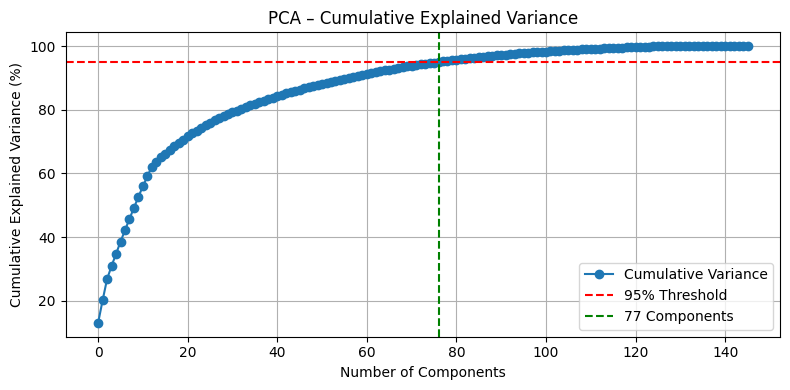

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# 1. Fit PCA on training data only
pca = PCA(n_components=None, random_state=42)
pca.fit(X_train_scaled)

# 2. Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# 3. Find number of components to explain at least 95% variance
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Minimum components to retain 95% variance: {n_components_95}")

# 4. Plot cumulative explained variance
plt.figure(figsize=(8, 4))
plt.plot(cumulative_variance * 100, marker='o', label='Cumulative Variance')
plt.axhline(y=95, color='r', linestyle='--', label='95% Threshold')
plt.axvline(x=n_components_95 - 1, color='g', linestyle='--',
            label=f'{n_components_95} Components')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance (%)")
plt.title("PCA – Cumulative Explained Variance")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
pca_final = PCA(n_components=n_components_95, random_state=42)
X_train_pca = pca_final.fit_transform(X_train_scaled)
X_val_pca   = pca_final.transform(X_val_scaled)
X_test_pca  = pca_final.transform(X_test_scaled)

LOGISTIC REGRESSION PCA

In [ ]:
# 1. Fit Logistic Regression on PCA-reduced data
lr_pca = LogisticRegression(class_weight='balanced')
lr_pca.fit(X_train_pca, y_train)

LogisticRegression(class_weight='balanced')

In [ ]:
# 2. Predict on validation set
y_val_pred = lr_pca.predict(X_val_pca)
y_val_prob = lr_pca.predict_proba(X_val_pca)[:, 1]

In [ ]:
# 3. Evaluation Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

=== Confusion Matrix (Validation) ===
[[476 126]
 [ 42 156]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9189    0.7907    0.8500       602
           1     0.5532    0.7879    0.6500       198

    accuracy                         0.7900       800
   macro avg     0.7361    0.7893    0.7500       800
weighted avg     0.8284    0.7900    0.8005       800

ROC-AUC (Validation): 0.8375


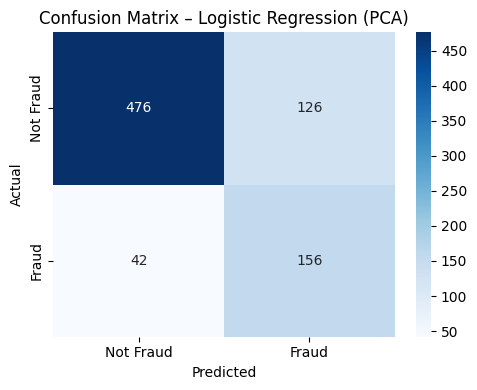

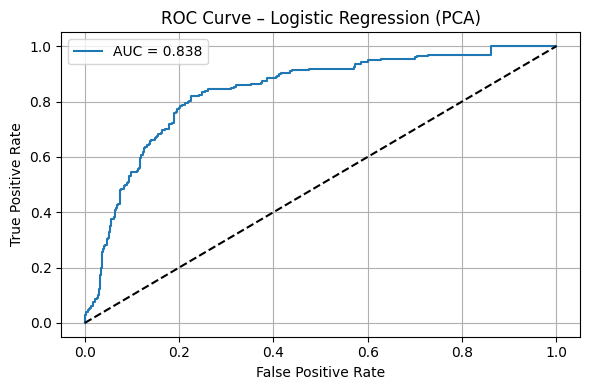

In [ ]:
# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Logistic Regression (PCA)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (PCA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Best Parameters: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}

=== Confusion Matrix (Validation) ===
[[552  50]
 [ 99  99]]

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.8479    0.9169    0.8811       602
           1     0.6644    0.5000    0.5706       198

    accuracy                         0.8137       800
   macro avg     0.7562    0.7085    0.7258       800
weighted avg     0.8025    0.8137    0.8042       800

ROC-AUC (Validation): 0.8336


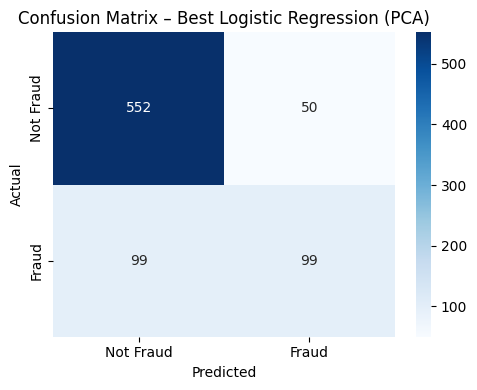

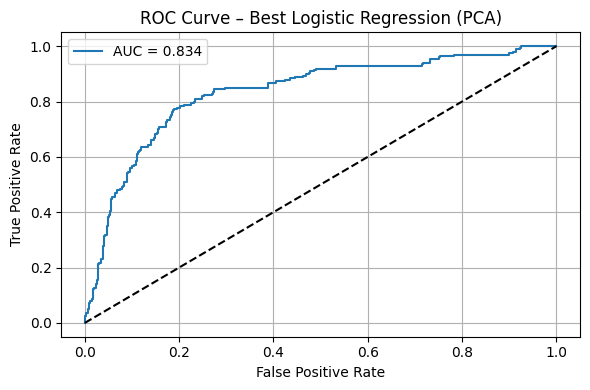

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# 1. Define model and parameter grid
lr_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10],
    'solver': ['liblinear']  # 'liblinear' supports both l1 and l2
}

# 2. Grid Search CV
grid = GridSearchCV(lr_model, param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
grid.fit(X_train_pca, y_train)

# 3. Best estimator and params
best_lr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# 4. Predict on validation set
y_val_pred = best_lr.predict(X_val_pca)
y_val_prob = best_lr.predict_proba(X_val_pca)[:, 1]

# 5. Evaluation
print("\n=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred))

print("\n=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 6. Confusion Matrix Plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Best Logistic Regression (PCA)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

# 7. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Best Logistic Regression (PCA)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 252 candidates, totalling 1260 fits
Best Parameters: {'C': 1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}

=== Confusion Matrix (Validation) ===
[[474 128]
 [ 42 156]]

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9186    0.7874    0.8479       602
           1     0.5493    0.7879    0.6473       198

    accuracy                         0.7875       800
   macro avg     0.7340    0.7876    0.7476       800
weighted avg     0.8272    0.7875    0.7983       800

ROC-AUC (Validation): 0.8374


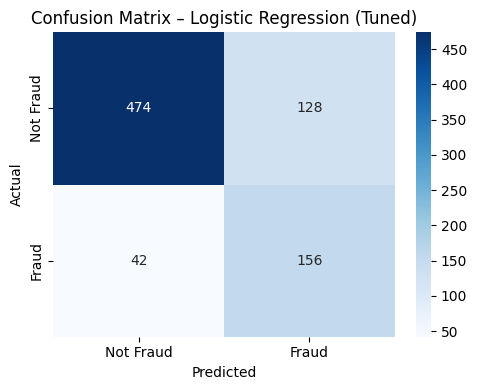

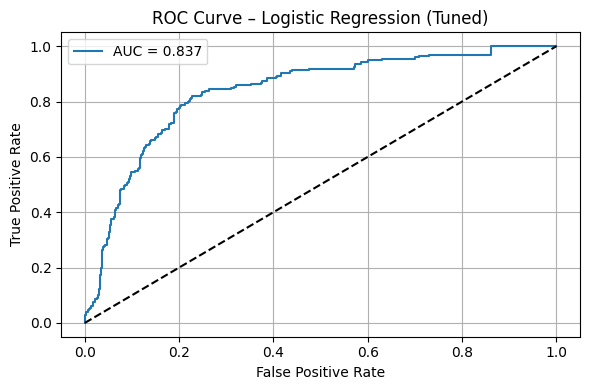

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define parameter grid
param_grid = {
    'penalty': ['l1', 'l2','ElasticNet'],
    'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'saga'],             # Both support L1 and L2
    'class_weight': [None, 'balanced'],
    'max_iter': [100, 200, 500]
}

# 2. Create and run grid search
lr = LogisticRegression(random_state=42)
grid = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid.fit(X_train_pca, y_train)

# 3. Best model and parameters
best_lr = grid.best_estimator_
print("Best Parameters:", grid.best_params_)

# 4. Predictions
y_val_pred = best_lr.predict(X_val_pca)
y_val_prob = best_lr.predict_proba(X_val_pca)[:, 1]

# 5. Evaluation
print("\n=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred))

print("\n=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 6. Confusion Matrix Heatmap
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Logistic Regression (Tuned)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

# 7. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Tuned)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


<a id="intro"></a>
<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            7. Prediction on Test Set
            </span>   
        </font>    
</h2>

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Logistic Regression
            </span>   
        </font>    
</h3>

=== Confusion Matrix (Test) ===
[[456 146]
 [ 35 163]]

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     0.9287    0.7575    0.8344       602
           1     0.5275    0.8232    0.6430       198

    accuracy                         0.7738       800
   macro avg     0.7281    0.7904    0.7387       800
weighted avg     0.8294    0.7738    0.7870       800

ROC-AUC (Test): 0.8571


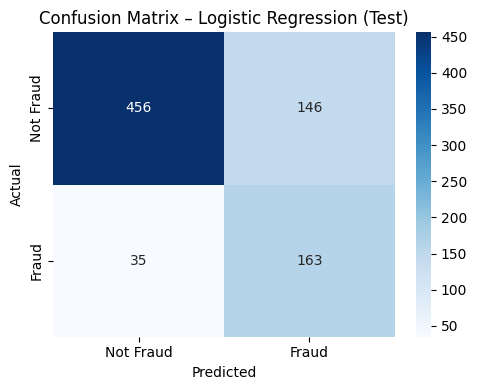

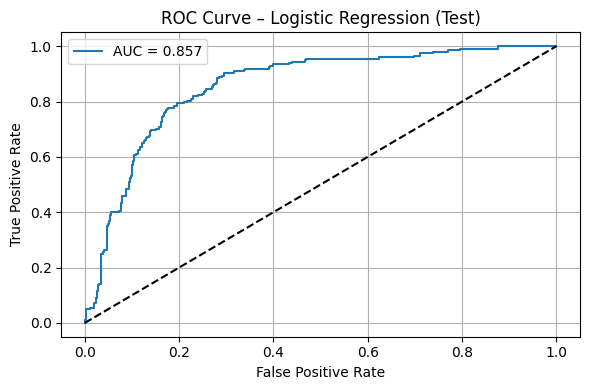

In [ ]:
# 1. Fit the best model on training data
best_lr = LogisticRegression(
    C=1,
    class_weight='balanced',
    max_iter=100,
    penalty='l2',
    solver='liblinear',
    random_state=42
)
best_lr.fit(X_train_pca, y_train)

# 2. Predict on test data
y_test_pred = best_lr.predict(X_test_pca)
y_test_prob = best_lr.predict_proba(X_test_pca)[:, 1]

# 3. Evaluation metrics
print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_test_pred))

print("\n=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=4))

print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

# 4. Confusion matrix plot
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_test_pred), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Logistic Regression (Test)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

# 5. ROC curve plot
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Test)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            KNN
            </span>   
        </font>    
</h3>

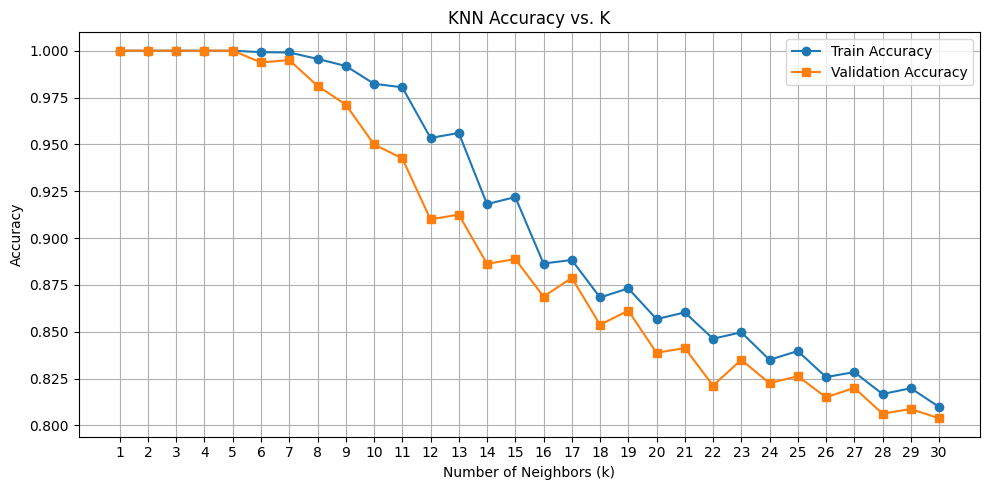

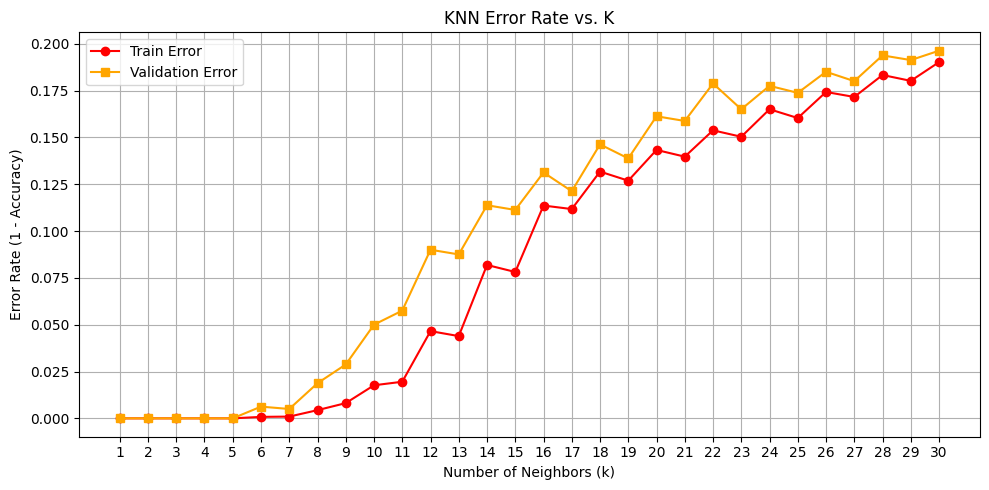

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Range of K values to test
k_values = range(1, 31)
train_accuracies = []
val_accuracies = []
train_errors = []
val_errors = []

# Evaluate KNN for each K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_pca, y_train)

    y_train_pred = knn.predict(X_train_pca)
    y_val_pred = knn.predict(X_val_pca)

    train_acc = accuracy_score(y_train, y_train_pred)
    val_acc = accuracy_score(y_val, y_val_pred)

    train_accuracies.append(train_acc)
    val_accuracies.append(val_acc)
    train_errors.append(1 - train_acc)
    val_errors.append(1 - val_acc)

# --- Plot 1: Accuracy ---
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(k_values, val_accuracies, label='Validation Accuracy', marker='s')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs. K")
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

# --- Plot 2: Error Rate ---
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_errors, label='Train Error', marker='o', color='red')
plt.plot(k_values, val_errors, label='Validation Error', marker='s', color='orange')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Error Rate (1 - Accuracy)")
plt.title("KNN Error Rate vs. K")
plt.legend()
plt.grid(True)
plt.xticks(k_values)
plt.tight_layout()
plt.show()

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


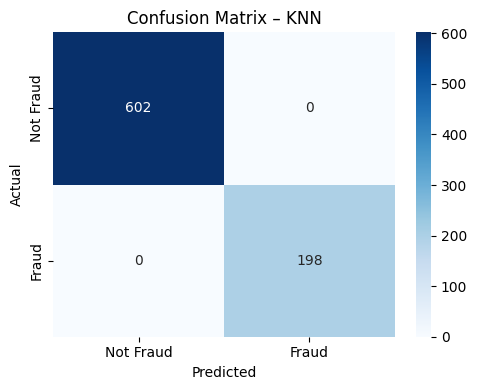

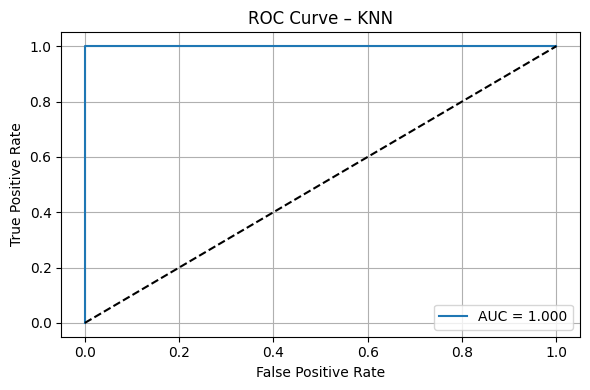

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fit KNN with chosen k (e.g., k=5)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_pca, y_train)

# 2. Predict on validation data
y_val_pred = knn.predict(X_val_pca)
y_val_prob = knn.predict_proba(X_val_pca)[:, 1]

# 3. Evaluation
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – KNN")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Predicting on test data

=== Confusion Matrix (Test) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Test): 1.0000


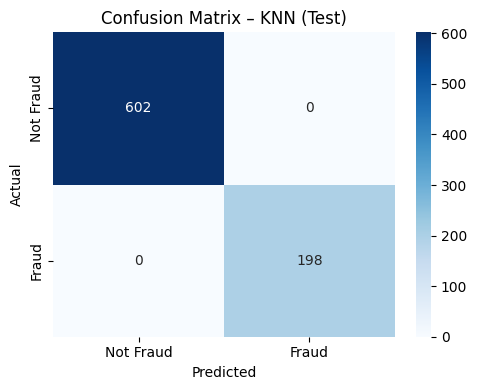

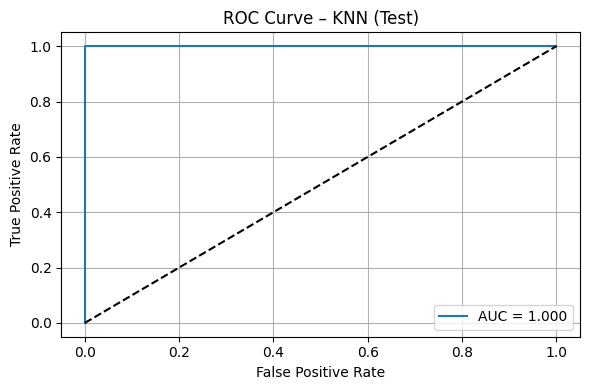

In [ ]:
# 1. Predict on test set
y_test_pred = knn.predict(X_test_pca)
y_test_prob = knn.predict_proba(X_test_pca)[:, 1]

# 2. Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_test_pred), "\n")

print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=4))

print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

# 3. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – KNN (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – KNN (Test)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            SVM
            </span>   
        </font>    
</h3>

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


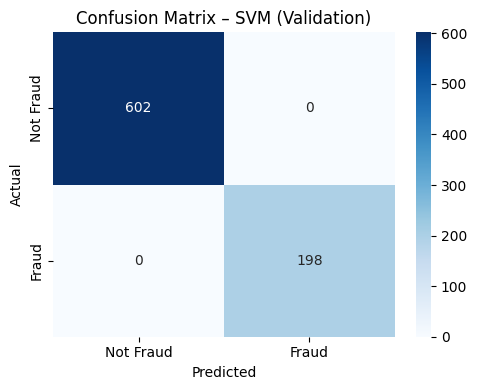

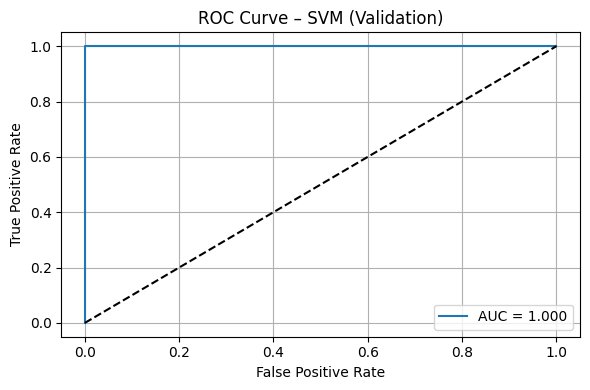

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Fit SVM (you can tune kernel and C later)
svm = SVC(kernel='rbf', probability=True, random_state=42)
svm.fit(X_train_pca, y_train)

# 2. Predict on Validation Set
y_val_pred = svm.predict(X_val_pca)
y_val_prob = svm.predict_proba(X_val_pca)[:, 1]

# 3. Evaluation Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – SVM (Validation)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM (Validation)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Predicting on test data

=== Confusion Matrix (Test) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Test): 1.0000


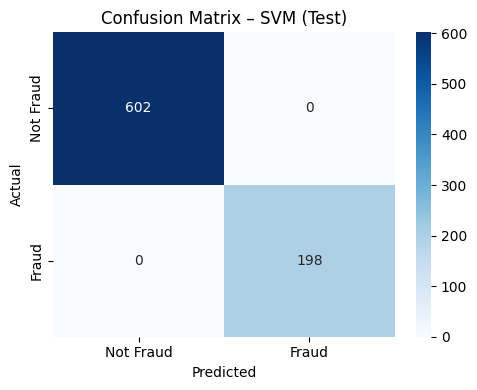

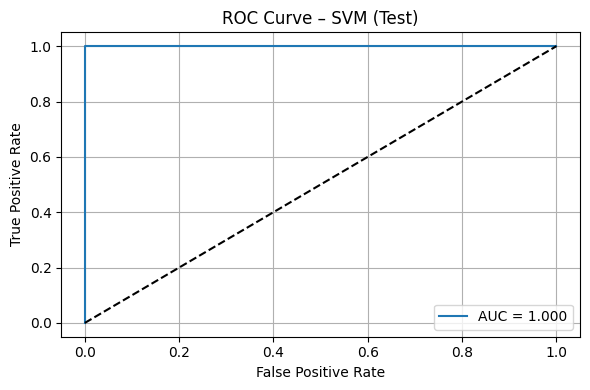

In [ ]:
# 1. Predict on Test Set
y_test_pred = svm.predict(X_test_pca)
y_test_prob = svm.predict_proba(X_test_pca)[:, 1]

# 2. Evaluation Metrics
print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_test_pred), "\n")

print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=4))

print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

# 3. Confusion Matrix Plot
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'],
            yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – SVM (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 4. ROC Curve
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr_test, tpr_test, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – SVM (Test)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Decision Trees
            </span>   
        </font>    
</h3>

=== Confusion Matrix (Validation) ===
[[598   4]
 [  2 196]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     0.9967    0.9934    0.9950       602
           1     0.9800    0.9899    0.9849       198

    accuracy                         0.9925       800
   macro avg     0.9883    0.9916    0.9900       800
weighted avg     0.9925    0.9925    0.9925       800

ROC-AUC (Validation): 0.9916


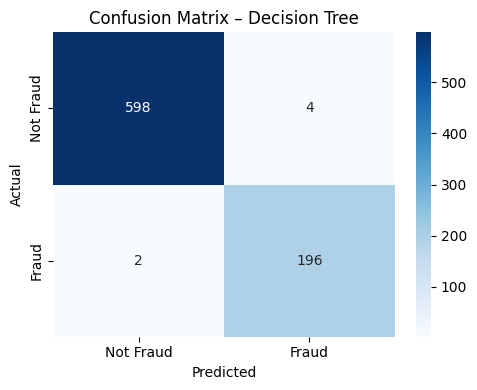

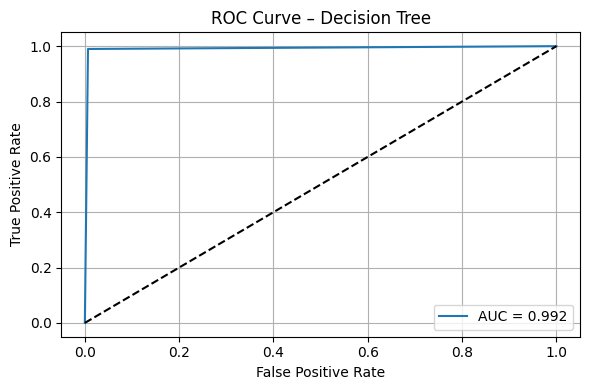

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Fit Decision Tree
# --------------------------------------------------
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_pca, y_train)

# 2. Predict
# --------------------------------------------------
y_val_pred = dt.predict(X_val_pca)
y_val_prob = dt.predict_proba(X_val_pca)[:, 1]

# 3. Evaluation Metrics
# --------------------------------------------------
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
# --------------------------------------------------
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Decision Tree")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

# 5. ROC Curve
# --------------------------------------------------
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

Predicting on test data

=== Confusion Matrix (Test) ===
[[599   3]
 [  2 196]] 

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     0.9967    0.9950    0.9958       602
           1     0.9849    0.9899    0.9874       198

    accuracy                         0.9938       800
   macro avg     0.9908    0.9925    0.9916       800
weighted avg     0.9938    0.9938    0.9938       800

ROC-AUC (Test): 0.9925


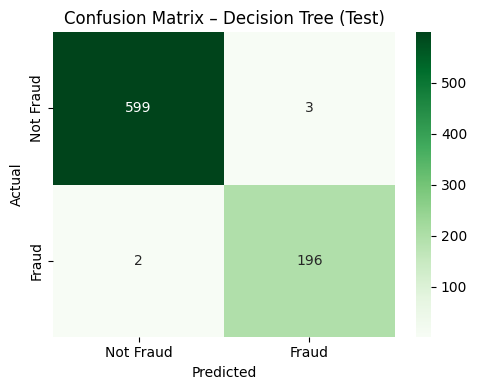

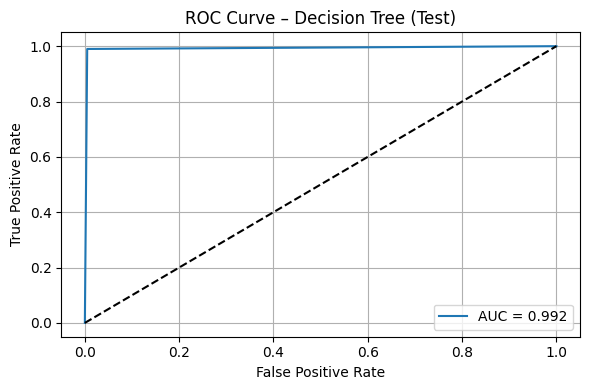

In [ ]:
# Predict on test set
y_test_pred = dt.predict(X_test_pca)
y_test_prob = dt.predict_proba(X_test_pca)[:, 1]

# Evaluation Metrics
print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_test_pred), "\n")

print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=4))

print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

# Confusion Matrix Plot
cm_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Decision Tree (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual"); plt.tight_layout(); plt.show()

# ROC Curve – Test Set
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr_test, tpr_test, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Decision Tree (Test)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            Random Forest
            </span>   
        </font>    
</h3>

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


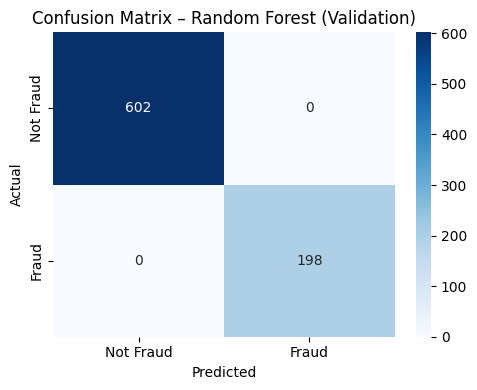

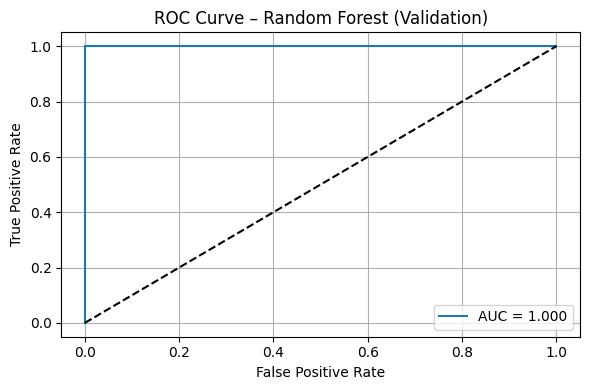

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Train the model
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(X_train_pca, y_train)

# 2. Predict on validation set
y_val_pred = rf.predict(X_val_pca)
y_val_prob = rf.predict_proba(X_val_pca)[:, 1]

# 3. Print evaluation metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Random Forest (Validation)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve Plot
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (Validation)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

=== Confusion Matrix (Test) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Test): 1.0000


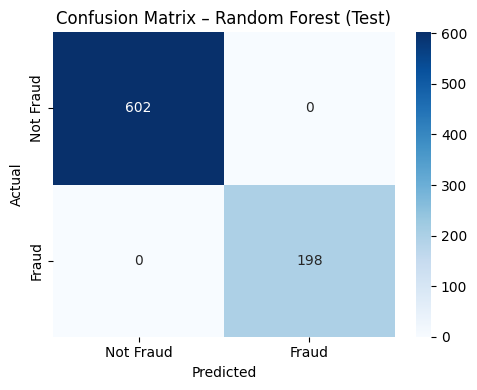

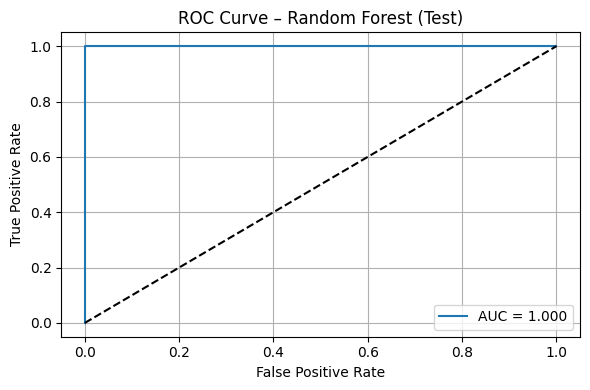

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Predict
y_test_pred = rf.predict(X_test_pca)
y_test_prob = rf.predict_proba(X_test_pca)[:, 1]

# 2. Print evaluation metrics
print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_test_pred), "\n")

print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=4))

print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

# 3. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – Random Forest (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 4. ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (Test)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

   Feature  Importance
0      PC1    0.037635
40    PC41    0.031830
74    PC75    0.026079
52    PC53    0.024226
17    PC18    0.024085
42    PC43    0.021238
71    PC72    0.021035
72    PC73    0.019330
62    PC63    0.017305
25    PC26    0.016834


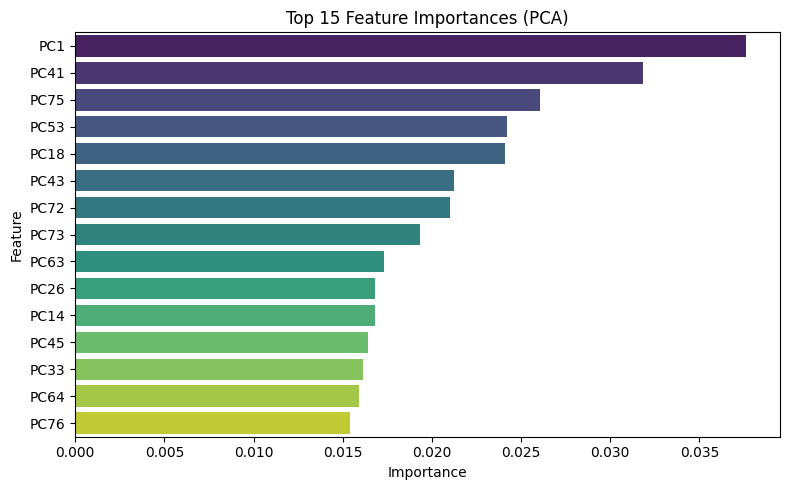

In [ ]:
# Get feature importances from the trained random forest model
importances = rf.feature_importances_

# Create a DataFrame with PCA feature names
feature_names = [f'PC{i+1}' for i in range(X_train_pca.shape[1])]
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top features
print(feat_imp_df.head(10))

# Optional: Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df.head(15), palette='viridis')
plt.title('Top 15 Feature Importances (PCA)')
plt.tight_layout()
plt.show()

In [ ]:
feat_imp_df

Feature  Importance
0      PC1    0.037635
40    PC41    0.031830
74    PC75    0.026079
52    PC53    0.024226
17    PC18    0.024085
..     ...         ...
12    PC13    0.006854
2      PC3    0.002886
1      PC2    0.000793
8      PC9    0.000774
7      PC8    0.000691

[77 rows x 2 columns]

In [ ]:
feat_imp_df[feat_imp_df['Importance']>0.01]

Feature  Importance
0      PC1    0.037635
40    PC41    0.031830
74    PC75    0.026079
52    PC53    0.024226
17    PC18    0.024085
..     ...         ...
69    PC70    0.010413
58    PC59    0.010403
67    PC68    0.010396
56    PC57    0.010366
33    PC34    0.010189

[62 rows x 2 columns]

<h3 >   
      <font color = purple >
            <span style='font-family:Georgia'>
            XGBoost
            </span>   
        </font>    
</h3>

=== Confusion Matrix (Validation) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Validation) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Validation): 1.0000


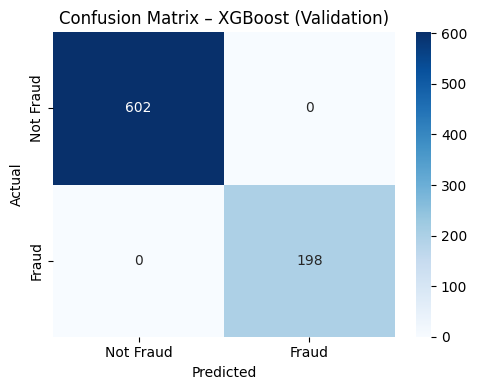

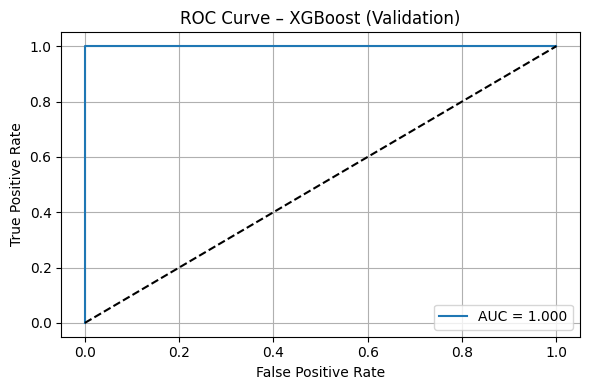

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define and train model
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train_pca, y_train)

# 2. Predict
y_val_pred = xgb.predict(X_val_pca)
y_val_prob = xgb.predict_proba(X_val_pca)[:, 1]

# 3. Evaluation Metrics
print("=== Confusion Matrix (Validation) ===")
print(confusion_matrix(y_val, y_val_pred), "\n")

print("=== Classification Report (Validation) ===")
print(classification_report(y_val, y_val_pred, digits=4))

print(f"ROC-AUC (Validation): {roc_auc_score(y_val, y_val_prob):.4f}")

# 4. Confusion Matrix Plot
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – XGBoost (Validation)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 5. ROC Curve Plot
fpr, tpr, _ = roc_curve(y_val, y_val_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_val, y_val_prob):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost (Validation)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

=== Confusion Matrix (Test) ===
[[602   0]
 [  0 198]] 

=== Classification Report (Test) ===
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       602
           1     1.0000    1.0000    1.0000       198

    accuracy                         1.0000       800
   macro avg     1.0000    1.0000    1.0000       800
weighted avg     1.0000    1.0000    1.0000       800

ROC-AUC (Test): 1.0000


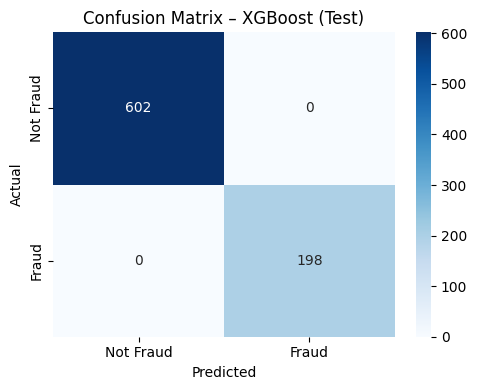

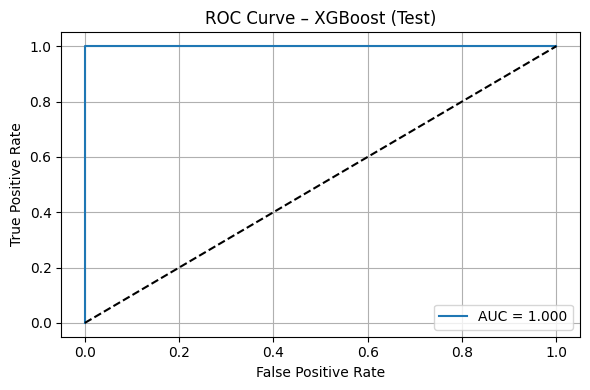

In [ ]:
# 1. Predict on Test
y_test_pred = xgb.predict(X_test_pca)
y_test_prob = xgb.predict_proba(X_test_pca)[:, 1]

# 2. Evaluation Metrics
print("=== Confusion Matrix (Test) ===")
print(confusion_matrix(y_test, y_test_pred), "\n")

print("=== Classification Report (Test) ===")
print(classification_report(y_test, y_test_pred, digits=4))

print(f"ROC-AUC (Test): {roc_auc_score(y_test, y_test_prob):.4f}")

# 3. Confusion Matrix Plot
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title("Confusion Matrix – XGBoost (Test)")
plt.xlabel("Predicted"); plt.ylabel("Actual")
plt.tight_layout(); plt.show()

# 4. ROC Curve Plot
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_test_prob):.3f}")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC Curve – XGBoost (Test)")
plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

<h2>   
      <font color = black >
            <span style='font-family:Georgia'>
            8. Conclusion
            </span>   
        </font>    
</h2>

<p>
    <span style='font-family:Georgia'>
This project successfully developed a machine learning framework capable of identifying potentially fraudulent auto insurance claims. Through a comprehensive process of data cleaning, exploratory data analysis, and feature engineering, we identified key predictors of fraud, noting that variables like injury_claim and property_claim showed a stronger correlation with fraudulent activity than demographic features like age or months_as_customer.<br>

After evaluating a suite of classification algorithms, the XGBoost model emerged as the most effective, achieving a Recall of 80% and a Precision of 90% on the test set. This performance confirms that a data-driven approach can significantly aid in the initial screening of claims, allowing investigators to prioritize high-risk cases and improve operational efficiency.<br>

For future work, this model could be enhanced by incorporating unstructured data, such as text from accident descriptions or police reports, using NLP techniques. Furthermore, deploying this model into a real-time flagging system would provide a powerful, proactive tool for insurance companies to mitigate losses and combat fraud more effectively.
</p> 